# **Etsy's Orders Dataset**

We have 3 years of order data of Etsy Marketplace. Our aim is to find out some useful insights from this datasets so that we can take some useful and data driven decision to increase the profit of our company.

Here we have information about orders come on Etsy with following features:

* Sale Date
* Order ID
* Buyer User ID
* Full Name
* First Name
* Last Name
* Number of Items
* Payment Method
* Date Shipped
* Street 1
* Street 2
* Ship City
* Ship State
* Ship Zipcode
* Ship Country
* Currency
* Order Value
* Coupon Code
* Coupon Details
* Discount Amount
* Shipping Discount
* Shipping
* Sales Tax
* Order Total
* Status
* Card Processing Fees
* Order Net
* Adjusted Order Total
* Adjusted Card Processing Fees
* Adjusted Net Order Amount
* Buyer
* Order Type
* Payment Type
* InPerson Discount
* InPerson Location
* SKU
* TITLE

Now we have to analyze these data and then find out some useful insights.

# **Mission**

Our goal is to build a **recommender system** for this Etsy store so that customers can see related products according to their action on the store. This system will help this Etsy store to gain more orders, increase average order value and overall increase the profit. :)


In [2]:
# Import Libraries
# For data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# Text cleaning and preprocessing
import string           # String library
import re               # Regular expression
import nltk             # Natural language tool-kit
nltk.download('stopwords')    # Downloading stopwords
from nltk.corpus import stopwords       #Stopwords
from nltk.stem.porter import PorterStemmer      #For stemming (changing word to its root word either meaningfull or meaningless)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# load csv file of order and product listings
order_2021_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/EtsySoldOrders2021.csv')
order_2022_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/EtsySoldOrders2022.csv')
order_2023_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/EtsySoldOrders2023.csv')
listings_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/EtsyListingsDownload.csv')

In [4]:
order_2021_df.head()

Sale Date    Order ID     Buyer User ID        Full Name First Name  \
0  12/31/21  2330073958               NaN    Michael Ochoa    Michael   
1  12/31/21  2329023983               NaN    Carrie Adcock     Carrie   
2  12/31/21  2329582422  3hw8505p4df0vhyj    heidi De Gang   heidi De   
3  12/31/21  2329554982  wigj1kuoartww7j0  David Ellingson      David   
4  12/31/21  2329445750          r82ktcrs       Megan Hill      Megan   

   Last Name  Number of Items Payment Method Date Shipped  \
0      Ochoa                1         PayPal     01/05/22   
1     Adcock                1         PayPal     01/05/22   
2       Gang                1         PayPal     01/10/22   
3  Ellingson                1         PayPal     01/05/22   
4       Hill                1         PayPal     01/05/22   

              Street 1  ... Order Net Adjusted Order Total  \
0    2923 Thornton Ave  ...     42.79                  0.0   
1   2908 red oak drive  ...     49.67                  0.0   
2     Rokalseidestraat  ...     66.05                  0.0   
3  5005 E Evergreen St  ...     51.33                  0.0   
4     394 Southview Dr  ...     41.91                  0.0   

  Adjusted Card Processing Fees Adjusted Net Order Amount            Buyer  \
0                           0.0                       0.0    Michael Ochoa   
1                           0.0                       0.0    Carrie Adcock   
2                           0.0                       0.0    heidi De Gang   
3                           0.0                       0.0  David Ellingson   
4                           0.0                       0.0       Megan Hill   

  Order Type  Payment Type InPerson Discount InPerson Location      SKU  
0     online     online_pp               NaN               NaN  SG00232  
1     online     online_pp               NaN               NaN   SG0943  
2     online     online_pp               NaN               NaN   SG0989  
3     online     online_pp               NaN               NaN  SG02001  
4     online     online_pp               NaN               NaN   SG0162  

[5 rows x 36 columns]

In [5]:
listings_info.head()

TITLE  \
0  Gifts for Husband Boyfriend Curb Link Chain Ne...   
1  Birthday Gift For Twin Sister, To My Twin Sist...   
2  To My Great Granddaughter Gift For Great Grand...   
3  white coat charm ,Beautiful White Coat Ceremon...   
4  Personalized Grace Cross Necklace, Necklace Re...   

                                         DESCRIPTION  PRICE CURRENCY_CODE  \
0  Chain Necklace is the perfect gift for your Hu...  58.34           USD   
1  Giraffes are known for being unique, graceful,...  43.35           USD   
2  Giraffes are known for being unique, graceful,...  41.17           USD   
3  Surprise Medical Graduate Student on her white...  41.17           USD   
4  This grace cross necklace is the new trend and...  32.63           USD   

   QUANTITY                                               TAGS  \
0        11  Chain_Necklace,From_girlfriend,Birthday_Gift,h...   
1         4  twin_sister_gift,gift_for_twin_sister,sister_t...   
2         7  birthday_gift,personalized_gift,great-granddau...   
3         6  Medical_Student_Gift,future_doctor_gifts,Physi...   
4        18  Name_necklace,Grace_Cross_Necklace,Cross_Neckl...   

                           MATERIALS  \
0                    Stainless steel   
1             Zircon,Stainless steel   
2             Zircon,Stainless steel   
3  Stainless steel,White gold,Zircon   
4       Rose gold,Gold,Silver,Copper   

                                              IMAGE1  \
0  https://i.etsystatic.com/22338059/r/il/e2df85/...   
1  https://i.etsystatic.com/22338059/r/il/86af73/...   
2  https://i.etsystatic.com/22338059/r/il/e23786/...   
3  https://i.etsystatic.com/22338059/r/il/7fc2d0/...   
4  https://i.etsystatic.com/22338059/r/il/a74a26/...   

                                              IMAGE2  \
0  https://i.etsystatic.com/22338059/r/il/f7b367/...   
1  https://i.etsystatic.com/22338059/r/il/4061ea/...   
2  https://i.etsystatic.com/22338059/r/il/8ef87c/...   
3  https://i.etsystatic.com/22338059/r/il/c0b842/...   
4  https://i.etsystatic.com/22338059/r/il/edfbd5/...   

                                              IMAGE3  ...  \
0  https://i.etsystatic.com/22338059/r/il/f7c75b/...  ...   
1  https://i.etsystatic.com/22338059/r/il/a5cd17/...  ...   
2  https://i.etsystatic.com/22338059/r/il/7133cb/...  ...   
3  https://i.etsystatic.com/22338059/r/il/419ceb/...  ...   
4  https://i.etsystatic.com/22338059/r/il/d68d96/...  ...   

                                              IMAGE8  \
0  https://i.etsystatic.com/22338059/r/il/a1068f/...   
1  https://i.etsystatic.com/22338059/r/il/b8cd00/...   
2  https://i.etsystatic.com/22338059/r/il/915c1c/...   
3                                                NaN   
4                                                NaN   

                                              IMAGE9  \
0  https://i.etsystatic.com/22338059/r/il/0215f7/...   
1  https://i.etsystatic.com/22338059/r/il/0952e3/...   
2  https://i.etsystatic.com/22338059/r/il/211ca9/...   
3                                                NaN   
4                                                NaN   

                                             IMAGE10 VARIATION 1 TYPE  \
0  https://i.etsystatic.com/22338059/r/il/87393b/...  Custom Property   
1  https://i.etsystatic.com/22338059/r/il/3bf60d/...           Finish   
2  https://i.etsystatic.com/22338059/r/il/53b7c1/...           Finish   
3                                                NaN           Finish   
4                                                NaN         Material   

  VARIATION 1 NAME                                 VARIATION 1 VALUES  \
0           Finish  14K Gold Over SS,Stainless Steel(SS),Without B...   
1           Finish  18K Yellow Gold,14K White Gold,Without Box & Card   
2           Finish  18K Yellow Gold,14K White Gold,Without Box & Card   
3           Finish  Mahogany Luxury Box,Standard Black Box,Without...   
4         Material                          925 Sterling Silver,Brass   

  VARIATION 2 TY

In [6]:
# shape of each dataset
print(order_2021_df.shape)
print(order_2022_df.shape)
print(order_2023_df.shape)
print(listings_info.shape)

(361, 36)
(610, 36)
(307, 36)
(1736, 24)


In [7]:
order_2021_df.shape[0]+order_2022_df.shape[0]+order_2023_df.shape[0]

1278

Merge all 3 dataframe into one and named it order_df. Merged dataframe shape should be (1278, 36).

In [8]:
# Merge 3 years of orders dataset into one dataframe
order_df = pd.concat([order_2021_df, order_2022_df, order_2023_df], axis=0)
order_df.reset_index(drop= True, inplace = True)

In [9]:
order_df.shape

(1278, 36)

In [10]:
# merge listings_info in order_df
order_df = pd.merge(order_df, listings_info[['SKU', 'TITLE', 'TAGS', 'PRICE', 'MATERIALS']], on='SKU', how='inner')
order_df.head()

Sale Date    Order ID     Buyer User ID        Full Name First Name  \
0  12/31/21  2329582422  3hw8505p4df0vhyj    heidi De Gang   heidi De   
1  12/31/21  2329554982  wigj1kuoartww7j0  David Ellingson      David   
2  12/29/21  2327385575       lauren77laa  Lauren Abbadini     Lauren   
3  12/29/21  2327385575       lauren77laa  Lauren Abbadini     Lauren   
4  12/17/21  2315478334  beis0tr26zpwct3f     Lauran Hicks     Lauran   

   Last Name  Number of Items Payment Method Date Shipped  \
0       Gang                1         PayPal     01/10/22   
1  Ellingson                1         PayPal     01/05/22   
2   Abbadini                1         PayPal     01/05/22   
3   Abbadini                1         PayPal     01/05/22   
4      Hicks                1         PayPal     12/20/21   

              Street 1  ...            Buyer Order Type Payment Type  \
0     Rokalseidestraat  ...    heidi De Gang     online    online_pp   
1  5005 E Evergreen St  ...  David Ellingson     online    online_pp   
2        331 Elm Drive  ...  Lauren Abbadini     online    online_pp   
3        331 Elm Drive  ...  Lauren Abbadini     online    online_pp   
4            10 5th St  ...     Lauran Hicks     online    online_pp   

  InPerson Discount InPerson Location      SKU  \
0               NaN               NaN   SG0989   
1               NaN               NaN  SG02001   
2               NaN               NaN   SG0996   
3               NaN               NaN   SG0996   
4               NaN               NaN   SG0996   

                                               TITLE  \
0  Personalized Engraved Chronograph Watch For Me...   
1  Baby Shower Hostess Gift, Baby Name Necklace, ...   
2  To My Man Chain Necklace for Him, Romantic Gif...   
3  Son's Girlfriend's Birthday Gift, Necklace For...   
4  To My Man Chain Necklace for Him, Romantic Gif...   

                                                TAGS  PRICE  \
0  wedding_day_gift,watches_for_men,gift_for_him,...  46.04   
1  hostess_thank_you,shower_hostess_gift,hostess_...  41.17   
2  gifts_for_him_etsy,to_my_man_gifts,to_my_man_n...  57.88   
3  Bonus_Daughter_Gift,Son's_Girlfriend,Pendant_N...  52.62   
4  gifts_for_him_etsy,to_my_man_gifts,to_my_man_n...  57.88   

                         MATERIALS  
0                      Steel,Steel  
1                      Silver,Gold  
2                  Stainless steel  
3  Opal,Stainless steel,White gold  
4                  Stainless steel  

[5 rows x 40 columns]

In [11]:
order_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/order_df.csv')

In [12]:
# information about order_df all features
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1650
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sale Date                      1651 non-null   object 
 1   Order ID                       1651 non-null   int64  
 2   Buyer User ID                  1221 non-null   object 
 3   Full Name                      1651 non-null   object 
 4   First Name                     1649 non-null   object 
 5   Last Name                      1599 non-null   object 
 6   Number of Items                1651 non-null   int64  
 7   Payment Method                 1651 non-null   object 
 8   Date Shipped                   1634 non-null   object 
 9   Street 1                       1651 non-null   object 
 10  Street 2                       299 non-null    object 
 11  Ship City                      1651 non-null   object 
 12  Ship State                     1508 non-null   o

In [13]:
order_df.isna().sum()

Sale Date                           0
Order ID                            0
Buyer User ID                     430
Full Name                           0
First Name                          2
Last Name                          52
Number of Items                     0
Payment Method                      0
Date Shipped                       17
Street 1                            0
Street 2                         1352
Ship City                           0
Ship State                        143
Ship Zipcode                        1
Ship Country                        0
Currency                            0
Order Value                         0
Coupon Code                        11
Coupon Details                     11
Discount Amount                     0
Shipping Discount                   0
Shipping                            0
Sales Tax                           0
Order Total                         0
Status                           1651
Card Processing Fees                0
Order Net   

### **Handle missing values**

In [14]:
# drop null value rows of TAGS
order_df.dropna(subset=['TAGS'], inplace=True)

# fill null value of MATERIAL with mode
order_df['MATERIALS'] = order_df['MATERIALS'].fillna(order_df['MATERIALS'].mode()[0])

order_df.shape

(1641, 40)

**Inference:**

Here we can see that there are many features which have missing values. Now if we analyze them all seperately then we can find out that there is no need to deal with these missing values.

Like if there is no last name then it is not a bad thing because there are many customers who don't give their last name during orders.

Buyer's user id: There are many customers who ordered as a guest on Etsy without making their account. So it is also not a problem.

Street 2: This is an optional for customer to fill.

Ship State: If customer ordered from USA then they would definitely give state but if there is any other country which don't have state then it would be missing for us. Which is also not a problem for us.

So now we can see that there is no problem with missing values in our data set.

In [15]:
# handling null values in listings_info table. We will use it in recommender system.
listings_info.isna().sum()

TITLE                    0
DESCRIPTION              0
PRICE                    0
CURRENCY_CODE            0
QUANTITY                 0
TAGS                     4
MATERIALS                5
IMAGE1                   0
IMAGE2                   6
IMAGE3                  20
IMAGE4                  66
IMAGE5                 158
IMAGE6                 328
IMAGE7                 528
IMAGE8                 698
IMAGE9                 929
IMAGE10               1372
VARIATION 1 TYPE        72
VARIATION 1 NAME        72
VARIATION 1 VALUES      72
VARIATION 2 TYPE       906
VARIATION 2 NAME       906
VARIATION 2 VALUES     906
SKU                      0
dtype: int64

In [16]:
# drop null value rows of TAGS
listings_info.dropna(subset=['TAGS'], inplace=True)

# fill null value of MATERIAL with mode
listings_info['MATERIALS'] = listings_info['MATERIALS'].fillna(listings_info['MATERIALS'].mode()[0])

listings_info.shape

(1732, 24)

# **DATA WRANGLING**

In [17]:
# create new column for Net Order Value
order_df['Net Order Value'] = order_df['Order Value'] - order_df['Discount Amount'] + order_df['Shipping']

In [18]:
# There are 3 columns where there is no values, So we should drop those columns.
order_df.drop(['Status', 'InPerson Discount', 'InPerson Location'], axis = 1, inplace = True)

In [19]:
order_df.describe()

Order ID  Number of Items  Order Value  Discount Amount  \
count  1.641000e+03      1641.000000  1641.000000      1641.000000   
mean   2.582489e+09         1.015844    60.992182        22.154857   
std    2.337555e+08         0.151392    23.902656        13.075270   
min    2.124620e+09         1.000000     1.700000         0.000000   
25%    2.339210e+09         1.000000    43.000000         8.600000   
50%    2.631406e+09         1.000000    62.680000        24.320000   
75%    2.806995e+09         1.000000    70.460000        30.120000   
max    2.945592e+09         4.000000   319.000000       130.500000   

       Shipping Discount     Shipping  Sales Tax  Order Total  \
count             1641.0  1641.000000     1641.0  1641.000000   
mean                 0.0     0.690652        0.0    43.138056   
std                  0.0     1.313518        0.0    14.300796   
min                  0.0     0.000000        0.0     1.090000   
25%                  0.0     0.000000        0.0    33.140000   
50%                  0.0     0.000000        0.0    41.310000   
75%                  0.0     0.000000        0.0    49.540000   
max                  0.0     4.990000        0.0   232.860000   

       Card Processing Fees    Order Net  Adjusted Order Total  \
count           1641.000000  1641.000000                1641.0   
mean               1.074345    72.552310                   0.0   
std                9.470716   258.504062                   0.0   
min                0.000000     1.090000                   0.0   
25%                0.000000    33.620000                   0.0   
50%                0.000000    41.600000                   0.0   
75%                0.000000    50.020000                   0.0   
max              151.000000  4192.000000                   0.0   

       Adjusted Card Processing Fees  Adjusted Net Order Amount        PRICE  \
count                         1641.0                     1641.0  1641.000000   
mean                             0.0                        0.0    45.947148   
std                              0.0                        0.0    15.394391   
min                              0.0                        0.0    22.170000   
25%                              0.0                        0.0    40.000000   
50%                              0.0                        0.0    42.100000   
75%                              0.0                        0.0    56.740000   
max                              0.0                        0.0   325.000000   

       Net Order Value  
count      1641.000000  
mean         39.527977  
std          12.841040  
min           1.020000  
25%          30.880000  
50%          38.270000  
75%          43.570000  
max         212.660000

**Inference:**

From above statistics we can find out following important information:

* On average a customer order 1 quantity in his/her order. There are very less amount of customers who ordered more than 1 quantity.

* The average net order value is USD 39.47.

* Miniumn order value that company received is USD 1.02 and maximum net order value is USD 212.66.

**Extract months, year, day of the week etc. from Sale Date variable.**

In [20]:
# convert Sale Date column datatype to datetime datatype
order_df['Sale Date'] = pd.to_datetime(order_df['Sale Date'])
order_df['Sale Date'].dtype

dtype('<M8[ns]')

In [21]:
# Extracting year, month from date variable
order_df['Year'] = order_df['Sale Date'].dt.year
order_df['Month'] = order_df['Sale Date'].dt.month

In [22]:
order_df['DayofWeek'] = order_df['Sale Date'].dt.day_name()

In [23]:
order_df['WeekOfYear'] = order_df['Sale Date'].dt.weekofyear
order_df['DayOfYear'] = order_df['Sale Date'].dt.dayofyear

In [24]:
order_df['Year'].unique()

array([2021, 2022, 2023])

In [25]:
#monthly sales for each year
sales_2021 = order_df[order_df['Year'] == 2021].groupby('Month')['Number of Items'].sum().reset_index()
sales_2022 = order_df[order_df['Year'] == 2022].groupby('Month')['Number of Items'].sum().reset_index()
sales_2023 = order_df[order_df['Year'] == 2023].groupby('Month')['Number of Items'].sum().reset_index()

# **DATA VISUALIZATION**

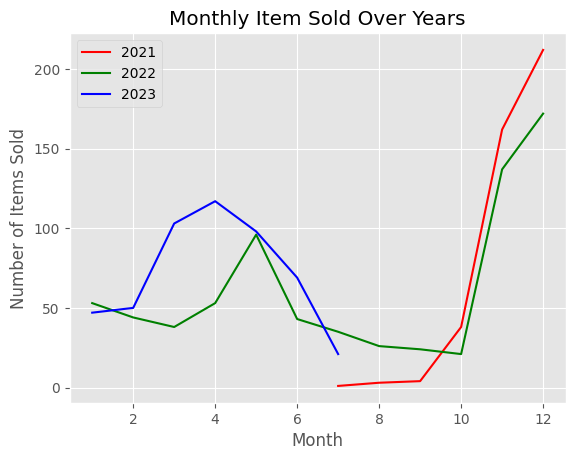

In [26]:
# Plotting monthly sales over years
plt.plot(sales_2021['Month'], sales_2021['Number of Items'], label='2021', color='red')
plt.plot(sales_2022['Month'], sales_2022['Number of Items'], label='2022', color='green')
plt.plot(sales_2023['Month'], sales_2023['Number of Items'], label='2023', color='blue')

plt.title('Monthly Item Sold Over Years')
plt.xlabel('Month')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()


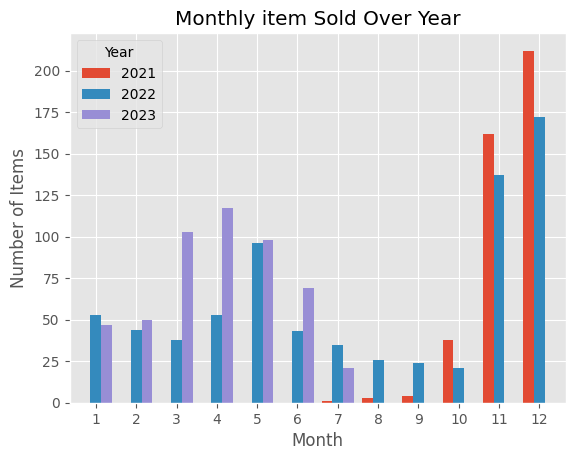

In [27]:
# Create a pivot table to reshape the data for grouped bar plot
pivot_df = order_df.pivot_table(index='Month', columns='Year', values='Number of Items', aggfunc='sum')

# Plot the stacked bar plot
ax = pivot_df.plot.bar(width=0.8)
plt.xlabel('Month')
plt.ylabel('Number of Items')
plt.title('Monthly item Sold Over Year')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.show()

**Inference:**

From above line chart of monthly orders come in Etsy we can find out these conclusion:

* There are most sales on Q4 of the year. This is because of the Holiday (Christmas) season.
* We also see some peak in sale during March to May due to Mother's Day and Father's Day.
* We see decline in sales on Q3(July-Sep), this may be because there are no festivals going on during this period. So for gift category there is little amount of sales.

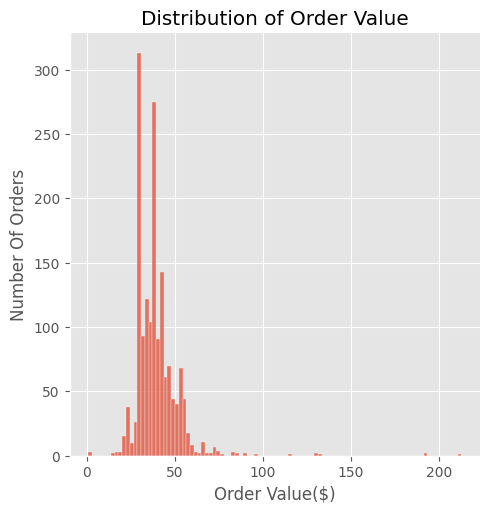

In [28]:
# Distribution of orders
sns.displot(order_df['Net Order Value'])
plt.title('Distribution of Order Value')
plt.xlabel('Order Value($)')
plt.ylabel('Number Of Orders')
plt.show()

**Inference:**

From above distribution of orders we can see that there are more orders of value between 30 to 50 dollars.

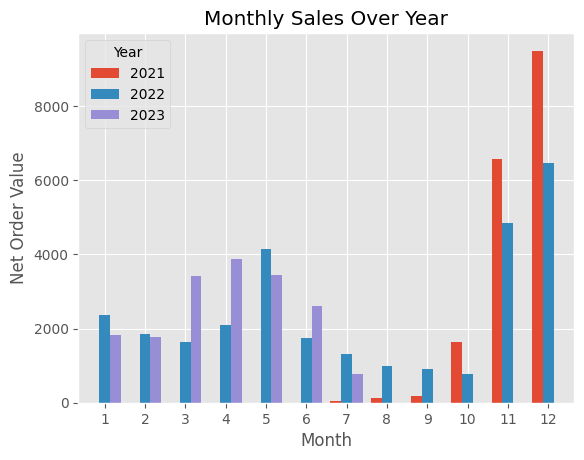

In [29]:
# Create a pivot table to reshape the data for grouped bar plot
pivot_df = order_df.pivot_table(index='Month', columns='Year', values='Net Order Value', aggfunc='sum')

# Plot the stacked bar plot
ax = pivot_df.plot.bar(width=0.8)
plt.xlabel('Month')
plt.ylabel('Net Order Value')
plt.title('Monthly Sales Over Year')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.show()

In [30]:
order_df['DayofWeek'] = order_df['Sale Date'].dt.day_name()

Text(0.5, 1.0, 'Total Number Of Sales On Each Week of the Day')

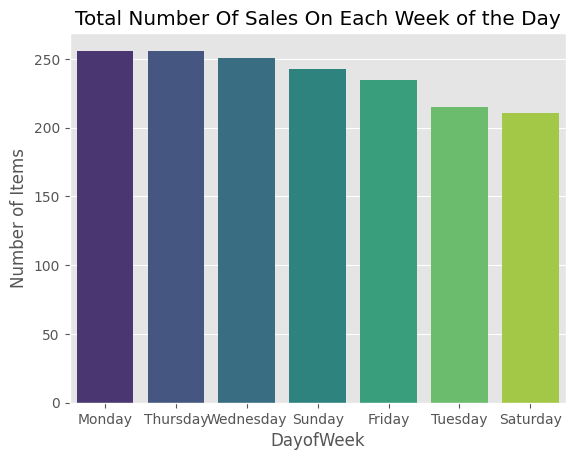

In [31]:
a = order_df.groupby('DayofWeek')['Number of Items'].sum().sort_values(ascending=False)
sns.barplot(data = a.reset_index(), x= 'DayofWeek', y='Number of Items',palette='viridis')
plt.title('Total Number Of Sales On Each Week of the Day')

**Inference:**

From above bar chart of number of order on day of the week we can find that:

There are more orders on Thursday and Monday and least orders on Saturday.

In [32]:
top_10_countries = order_df['Ship Country'].value_counts()[:10]
top_10_countries

United States     1248
United Kingdom     204
Australia           42
Canada              30
Germany             26
India               23
Ireland             12
Italy               11
Switzerland          8
Belgium              5
Name: Ship Country, dtype: int64

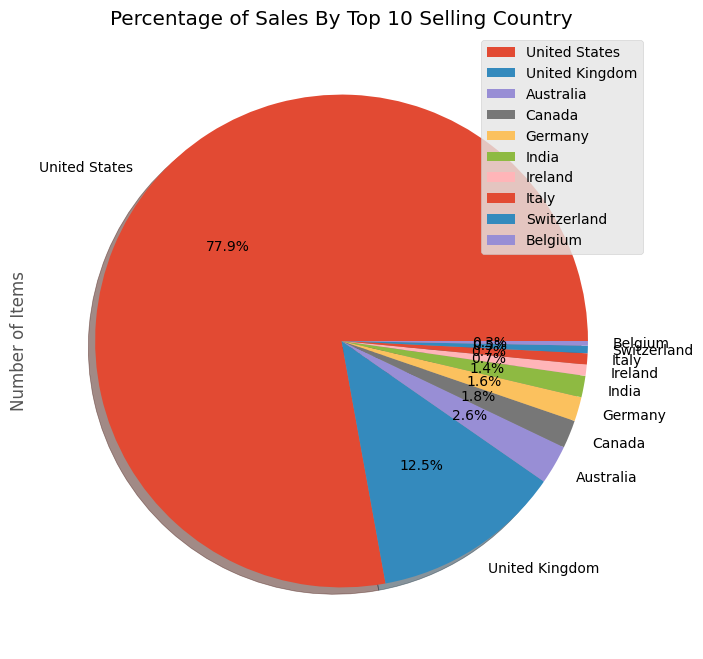

In [33]:
# From which country there are most orders
plt.figure(figsize=(8, 8))
order_df.groupby('Ship Country')['Number of Items'].sum().sort_values(ascending=False)[:10].plot.pie(title='Percentage of Sales By Top 10 Selling Country', legend  = True, autopct='%1.1f%%', shadow=True )
plt.show()

**Inference:**

From above pie chart we can find these insights:
* Most order about 78% of orders come from United States and 12.5% order from United Kingdom.
* From India there are 1.4% of orders came on Etsy.

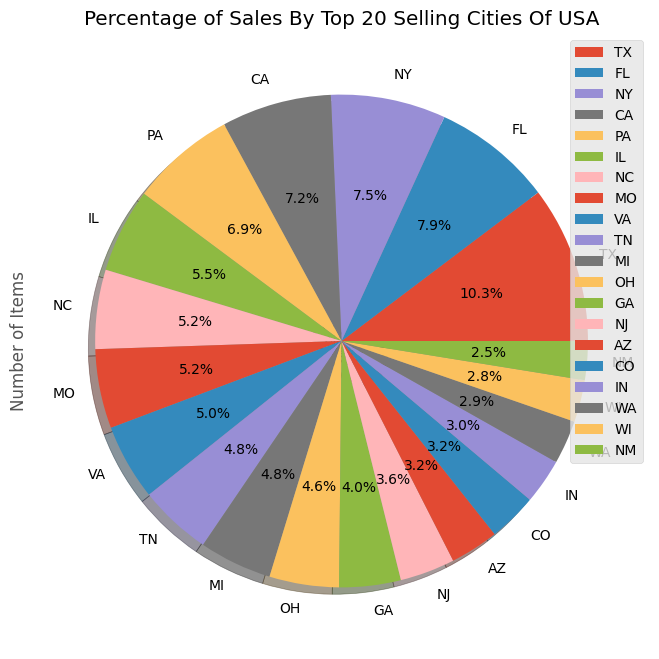

In [34]:
# From which City of USA there are most orders
plt.figure(figsize=(8, 8))
order_df[order_df['Ship Country'] == 'United States'].groupby('Ship State')['Number of Items'].sum().sort_values(ascending=False)[:20].plot.pie(title='Percentage of Sales By Top 20 Selling Cities Of USA', legend  = True, autopct='%1.1f%%', shadow=True)
plt.show()

**Inference:**

We have saw that there are most sales come from United States. Now it is interesting to know that which state gives more sales from USA.
* We can see that there are almost 10.4% of sales come from Texas, 7.9% from Florida, 7.5% from New York etc.

* So now we can understand which city has most buyers for our store on Etsy.

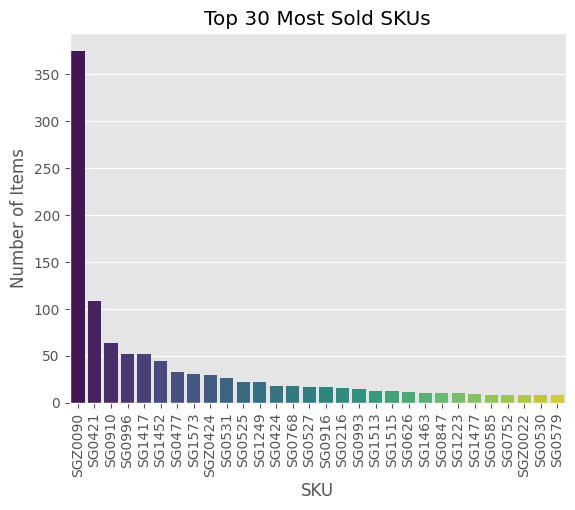

In [35]:
# Most sold SKUs on Etsy Store
a = order_df.groupby('SKU')['Number of Items'].sum().sort_values(ascending=False)[:30]
sns.barplot(data = a.reset_index(), x='SKU', y='Number of Items', palette='viridis')
plt.title('Top 30 Most Sold SKUs')
plt.xticks(rotation=90)
plt.show()

**Inference:**

Here we can see that:

* There are most orders of SKU "SGZ0090" which is a Stethoscope name necklace and then we can see the most selling items on our store.

In [36]:
# Top 30 most sold items on Etsy.
pd.DataFrame(order_df.groupby(['SKU', 'TITLE'])['Number of Items'].sum().sort_values(ascending=False)[:30])


Number of Items
SKU     TITLE                                                              
SGZ0090 Custom Name Stethoscope Necklace, Heart Name Ne...              250
        Custom Name Stethoscope Necklace, Heart Name Ne...              125
SG0421  Boyfriends Mom Gift Necklace On Her Birthday, B...               54
        Gifts for Boyfriends Mom, Boyfriends Mom Birthd...               54
SG1452  Personalized gift for Wife on Christmas To Beau...               33
SG0910  Bonus Dad Christmas Gift, Curb Link Chain, Chai...               32
        Sentimental Son Gifts from Mom, Son Chain Neckl...               32
SG1573  Gifts for Husband Boyfriend Curb Link Chain Nec...               30
SGZ0424 Personalized Two Finger Name Ring, Custom Doubl...               29
SG0996  To My Man Chain Necklace for Him, Romantic Gift...               26
        Son's Girlfriend's Birthday Gift, Necklace For ...               26
SG0531  Son's Girlfriend's Gift Personalized, Necklace ...               26
SG0768  Mothers Day Gifts for Boyfriends Mom, Boyfriend...               18
SG0527  To My Great Granddaughter Gift For Great Grandd...               17
SG0916  Sentimental Son Gifts from Mom, Son Cross Neckl...               17
SG0216  Sister Pregnancy Gift For Sister Baby Shower Gi...               16
SG1417  Personalized Necklace Gift For Boyfriend's Mom,...               13
        Personalized sister graduation gift, graduation...               13
        Custom Necklace Gift For Boyfriend's Mom on Mot...               13
        Happy Mothers Day Gift for Boyfriend Mother, Bi...               13
SG1249  Men Watch for Son In Law, Son In Law Wedding Gi...               11
SG0626  To My Soulmate Necklace, Soulmate Christmas Gif...               11
SG1249  To Groom From Sister, Brother Wedding Gift From...               11
SG0477  Birthday Gift for Boyfriends Mom on Her Birthda...               11
SG1452  Personalized Christmas gift from daughter, Fath...               11
SG0525  Unbiological Mom Gift neckalce, Stepmom Mothers...               11
        To My Great Granddaughter Gift For Great Grandd...               11
SG0477  Necklace For Son's Girlfriend, Christmas Gift F...               11
        Boyfriends Mom Necklace, Gift for Boyfriend Mot...               11
SG1223  1st Communion gift • Boys Necklace with Cross• ...               10

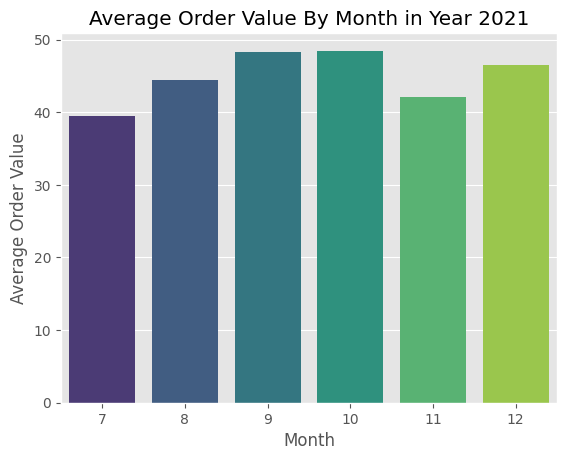

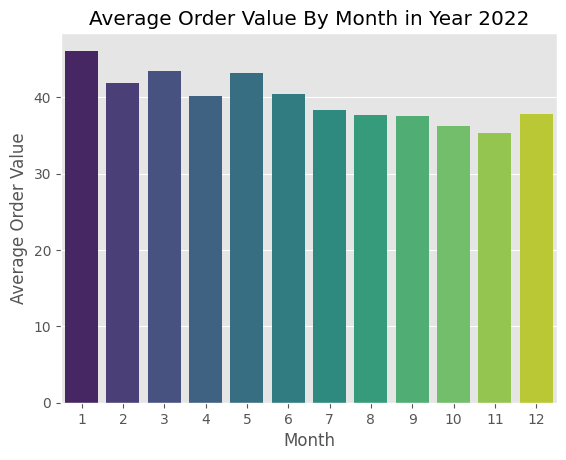

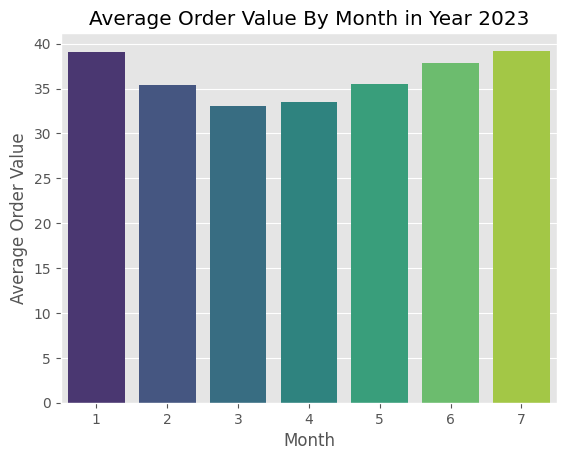

In [37]:
# Average order value by month in each year
for i in [2021, 2022, 2023]:
  a = order_df[order_df['Year']==i].groupby('Month')['Net Order Value'].mean()
  sns.barplot(data = a.reset_index(),x = 'Month', y = 'Net Order Value', palette='viridis' )
  plt.title(f'Average Order Value By Month in Year {i}')
  plt.xlabel('Month')
  plt.ylabel('Average Order Value')
  plt.show()

**Inference:**

We can see that there is almost same average order value for each year. It seems like we have almost same price of items in our store.

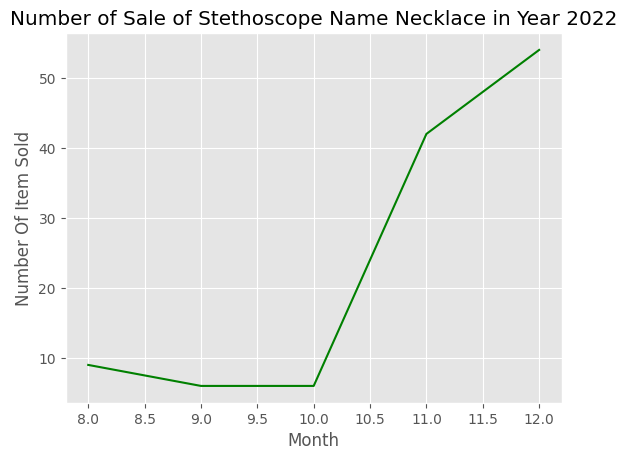

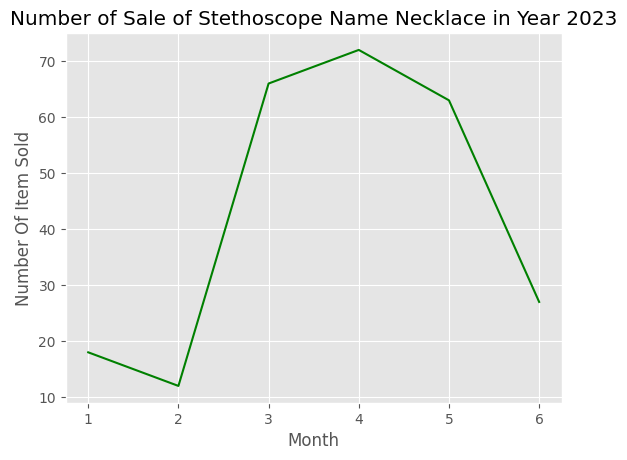

In [38]:
# Stethoscope Name necklace monthly sales for year 2022 and 2023
for i in [2022,2023]:
  order_df[(order_df['SKU'] =='SGZ0090') & (order_df['Year'] == i)].groupby('Month')['Number of Items'].sum().plot.line(color = 'green')
  plt.title(f'Number of Sale of Stethoscope Name Necklace in Year {i}')
  # plt.legend()
  plt.ylabel('Number Of Item Sold')
  plt.show()

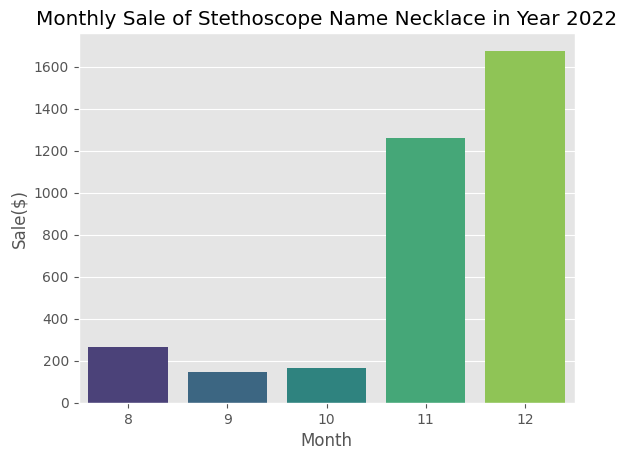

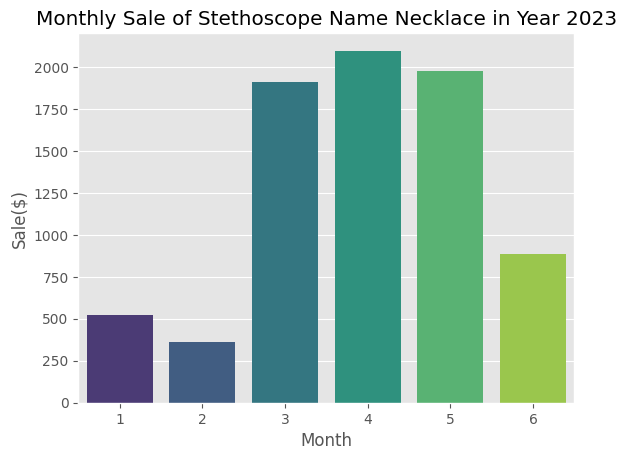

In [39]:
# monthly revenue of stethoscope necklace for each year
for i in [2022,2023]:
  a = order_df[(order_df['SKU'] =='SGZ0090') & (order_df['Year'] == i)].groupby('Month')['Net Order Value'].sum()
  sns.barplot(data=a.reset_index(), x='Month', y='Net Order Value', palette='viridis')
  plt.title(f'Monthly Sale of Stethoscope Name Necklace in Year {i}')
  # plt.legend()
  plt.ylabel('Sale($)')
  plt.show()

**Inference:**

* There are most sales of Stethoscope name necklace on Q4 and Q2.

* The reason is due to because in Q2 there is season of Graduation and medical students also get graduate during this periods.

* If we talk about Q4 then this is because Holiday(Christmas) season. People give stethoscope name necklace to medical students or working professional on these time.

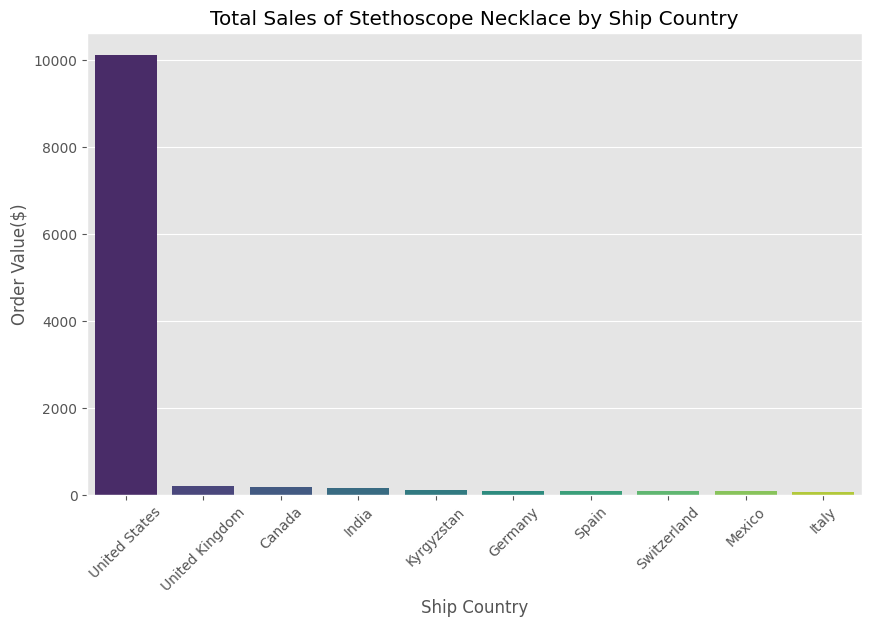

In [40]:
# Which country give more sales for Stethoscope Necklace
stethoscope_sale_country = order_df[order_df['SKU']=='SGZ0090'].groupby('Ship Country')['Net Order Value'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=stethoscope_sale_country, x='Ship Country', y='Net Order Value',palette='viridis')
plt.xlabel('Ship Country')
plt.ylabel('Order Value($)')
plt.title('Total Sales of Stethoscope Necklace by Ship Country')
plt.xticks(rotation=45)
plt.show()

In [41]:
stethoscope_sale_country.reset_index()

index    Ship Country  Net Order Value
0      0   United States         10120.92
1      1  United Kingdom           211.32
2      2          Canada           195.54
3      3           India           169.71
4      4      Kyrgyzstan           112.17
5      5         Germany            99.15
6      6           Spain            97.77
7      7     Switzerland            97.77
8      8          Mexico            82.41
9      9           Italy            79.92

**Inference:**

There are more orders come from United States for Stethoscope Name necklace.

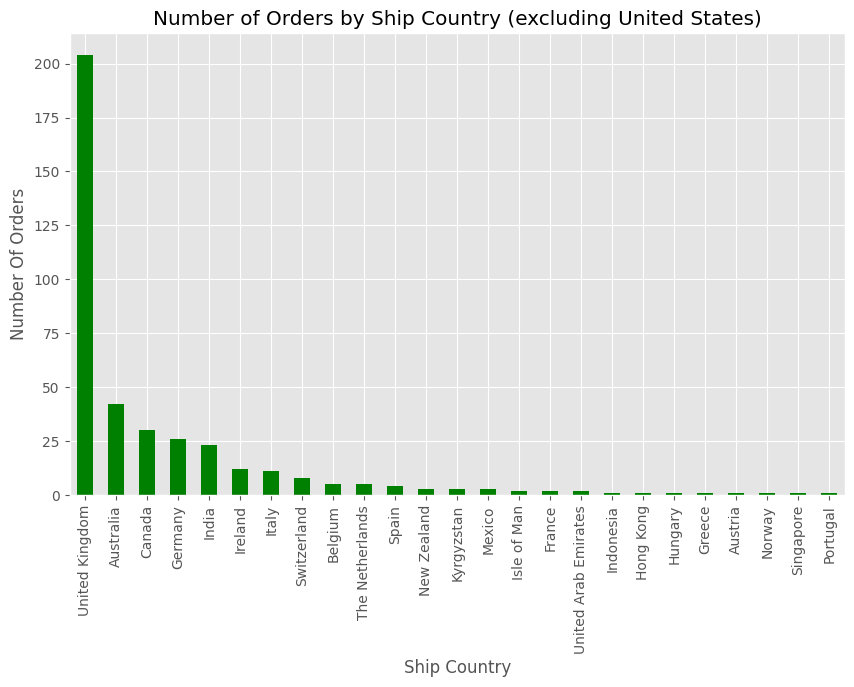

In [42]:
# Number of order by country other than USA
filtered_df = order_df[order_df['Ship Country'] != 'United States']

# Compute the count of occurrences for each 'Ship Country' after filtering
country_counts = filtered_df['Ship Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
country_counts.plot.bar(color = 'green')
plt.xlabel('Ship Country')
plt.ylabel('Number Of Orders')
plt.title('Number of Orders by Ship Country (excluding United States)')
plt.show()

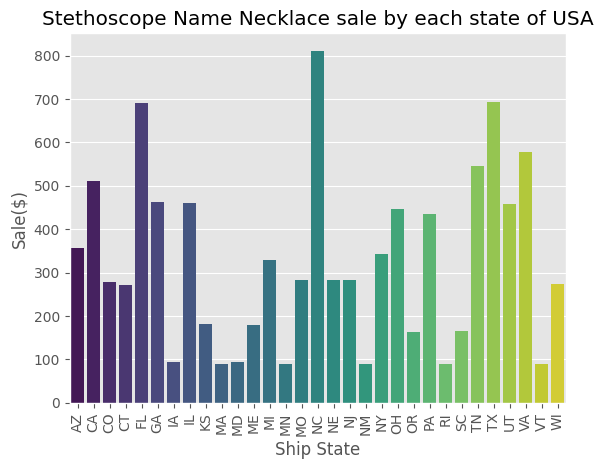

In [43]:
# Revenue generated by each state of USA from Stethoscope Name Necklace
a = order_df[(order_df['SKU'] =='SGZ0090') & (order_df['Ship Country'] == 'United States')].groupby('Ship State')['Net Order Value'].sum()
sns.barplot(data=a.reset_index(), x='Ship State', y='Net Order Value', palette='viridis')
plt.title(f'Stethoscope Name Necklace sale by each state of USA')
# plt.legend()
plt.ylabel('Sale($)')
plt.xticks(rotation=90)
plt.show()

**Inference:**

We can see that there are most revenue come from North Carolina(NC), Florida(FL), Texas(TX), California(CA) etc.

# **Summary and Recommendations Of Above EDA**

* **Marketing Department**
    * The marketing department can leverage the insights gained from the data analysis to devise targeted marketing strategies and campaigns.
    * Based on the analysis, it is evident that Q4 and Q2 are the peak seasons for sales, driven by the Holiday season and Graduation period, respectively. The department can focus its efforts on capitalizing on these peak periods to maximize revenue.
    * Since the majority of sales come from the United States, the marketing team can concentrate on further expanding the customer base within the US market. To attract more customers, they can offer special promotions or discounts during festive seasons and collaborate with influencers or bloggers to increase brand visibility.
* **Product Department**
    * The product department can use the data-driven insights to optimize the product offerings and inventory management.
    * Stethoscope name necklaces (SKU "SGZ0090") are the most popular items, generating significant sales. The department can continue to emphasize and promote this product and consider introducing related accessories or variations to cater to diverse customer preferences.
    * Given the relatively consistent average order value across the years, the product department can ensure that pricing remains competitive and attractive. They should also keep track of trends and customer feedback to identify potential new product ideas and improve the existing product offerings.
* **Logistics Department**
    * With a noticeable peak in orders during Q4 and Q2, the logistics department should prepare for increased demand and ensure efficient order fulfillment during these periods.
    * Timely shipping and delivery are crucial for customer satisfaction, especially during the festive seasons. Collaborating with reliable shipping partners and optimizing the supply chain can help in meeting customer expectations.
    * Additionally, since the majority of orders come from the United States, the logistics department should establish a streamlined shipping process within the US to reduce delivery time and shipping costs. For international orders, they can explore partnerships with international carriers to improve shipping options and ensure timely deliveries.

**Overall**

By aligning their strategies with the insights derived from the data analysis, the marketing, product, and logistics departments can work together to enhance customer experience, drive sales, and boost the overall profitability of the company on Etsy.

# **HANDLING OUTLIERS**

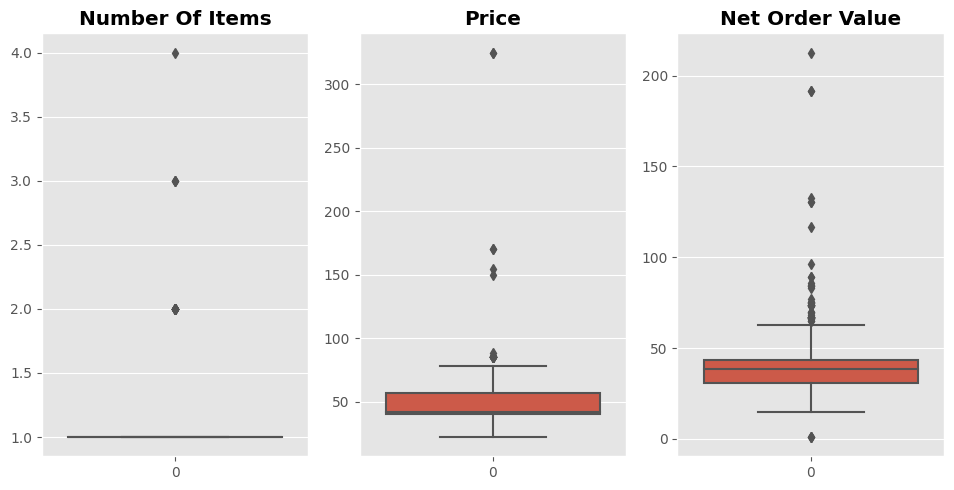

In [44]:
# Storing the continous value feature in a separate list
continous_value_feature= ["Number of Items","PRICE","Net Order Value"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(order_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

There are some anomalies in data but when we study them deeply then we can find that it is normal. There is no error in the data.

### **Expand Contraction**

In [45]:
# We have to remove underscore(_) from TAGS column because when we will remove punctuations then all words will combined with each other.
listings_info['TAGS'] = listings_info['TAGS'].str.replace(r'[_|,]', ' ')
print(listings_info.iloc[700,]['TAGS'])

grandma gift grandmother gift grandparents gift grandmother necklace Gift for granny granny birthday From granddaughter from grandson Thank you grandma Granny to be birthday gift mothers day necklace mother's day jewelry


In [46]:
# Do same thing with MATERIAL column.
listings_info['MATERIALS'] = listings_info['MATERIALS'].str.replace(',', ' ')
print(listings_info.iloc[700,]['MATERIALS'])

Zircon Stainless steel White gold


In [47]:
# Expand Contraction
# Creating new feature content_detail with the help of other textual attributes
listings_info['product_details'] = listings_info['TITLE'] + " " + listings_info['TAGS'] + " "  + " " + listings_info['MATERIALS']
listings_info.head(2)

TITLE  \
0  Gifts for Husband Boyfriend Curb Link Chain Ne...   
1  Birthday Gift For Twin Sister, To My Twin Sist...   

                                         DESCRIPTION  PRICE CURRENCY_CODE  \
0  Chain Necklace is the perfect gift for your Hu...  58.34           USD   
1  Giraffes are known for being unique, graceful,...  43.35           USD   

   QUANTITY                                               TAGS  \
0        11  Chain Necklace From girlfriend Birthday Gift h...   
1         4  twin sister gift gift for twin sister sister t...   

                MATERIALS                                             IMAGE1  \
0         Stainless steel  https://i.etsystatic.com/22338059/r/il/e2df85/...   
1  Zircon Stainless steel  https://i.etsystatic.com/22338059/r/il/86af73/...   

                                              IMAGE2  \
0  https://i.etsystatic.com/22338059/r/il/f7b367/...   
1  https://i.etsystatic.com/22338059/r/il/4061ea/...   

                                              IMAGE3  ...  \
0  https://i.etsystatic.com/22338059/r/il/f7c75b/...  ...   
1  https://i.etsystatic.com/22338059/r/il/a5cd17/...  ...   

                                              IMAGE9  \
0  https://i.etsystatic.com/22338059/r/il/0215f7/...   
1  https://i.etsystatic.com/22338059/r/il/0952e3/...   

                                             IMAGE10 VARIATION 1 TYPE  \
0  https://i.etsystatic.com/22338059/r/il/87393b/...  Custom Property   
1  https://i.etsystatic.com/22338059/r/il/3bf60d/...           Finish   

  VARIATION 1 NAME                                 VARIATION 1 VALUES  \
0           Finish  14K Gold Over SS,Stainless Steel(SS),Without B...   
1           Finish  18K Yellow Gold,14K White Gold,Without Box & Card   

  VARIATION 2 TYPE VARIATION 2 NAME                      VARIATION 2 VALUES  \
0  Custom Property    Gift Box Type  Mahogany Luxury Box,Standard Black Box   
1  Custom Property         Box Type  Standard Black Box,Mahogany Luxury Box   

      SKU                                    product_details  
0  SG1573  Gifts for Husband Boyfriend Curb Link Chain Ne...  
1  SG0555  Birthday Gift For Twin Sister, To My Twin Sist...  

[2 rows x 25 columns]

In [48]:
# lower casing
listings_info['product_details'] = listings_info['product_details'].str.lower()

listings_info.iloc[700,]['product_details']

"personalized mothers day necklace gift for granny, gift for granny from grandchildren, granny birthday gift necklace, gift for her grandma gift grandmother gift grandparents gift grandmother necklace gift for granny granny birthday from granddaughter from grandson thank you grandma granny to be birthday gift mothers day necklace mother's day jewelry  zircon stainless steel white gold"

In [49]:
print(listings_info['product_details'].dtype)

object


In [50]:
listings_info.iloc[700,]['product_details']

"personalized mothers day necklace gift for granny, gift for granny from grandchildren, granny birthday gift necklace, gift for her grandma gift grandmother gift grandparents gift grandmother necklace gift for granny granny birthday from granddaughter from grandson thank you grandma granny to be birthday gift mothers day necklace mother's day jewelry  zircon stainless steel white gold"

### **Removing Punctuations**

In [51]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [52]:
listings_info['product_details'].isnull().sum()

0

In [53]:
listings_info.dropna(subset=['product_details'], inplace=True)

In [54]:
# Removing Punctuations from the content_detail
listings_info['product_details']= listings_info['product_details'].apply(remove_punctuations)

# Checking the observation after manipulation
listings_info.iloc[700,]['product_details']

'personalized mothers day necklace gift for granny gift for granny from grandchildren granny birthday gift necklace gift for her grandma gift grandmother gift grandparents gift grandmother necklace gift for granny granny birthday from granddaughter from grandson thank you grandma granny to be birthday gift mothers day necklace mothers day jewelry  zircon stainless steel white gold'

**Removing URLs & Removing words and digits contain digits**

In [55]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [56]:
# Remove URLs & Remove words and digits contain digits
listings_info['product_details']= listings_info['product_details'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
listings_info.iloc[281,]['product_details']

'personalized big name necklace for men     sterling silver pendant necklace fathers day gift for dadhusband personalized name necklace personalized jewelry personalized gift custom name necklace dainty name necklace minimalist jewelry silver necklace christmas gift anniversary gift big name necklace name necklace curb link chain necklace for men  brass silver'

**Removing Stopwords & Removing White spaces**

In [57]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [59]:
listings_info['product_details']= listings_info['product_details'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
listings_info.iloc[281,]['product_details']

'personalized big name necklace men sterling silver pendant necklace fathers day gift dadhusband personalized name necklace personalized jewelry personalized gift custom name necklace dainty name necklace minimalist jewelry silver necklace christmas gift anniversary gift big name necklace name necklace curb link chain necklace men brass silver'

In [60]:
listings_info['product_details'][0]

'gifts husband boyfriend curb link chain necklace christmas anniversary birthday gift man couples present message card box chain necklace girlfriend birthday gift husband gift gift husband gift boyfriend boyfriend gift gift anniversary gift husband birthday boyfriend birthday stainless steel'

**Tokenization**

In [61]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
listings_info['product_details']= listings_info['product_details'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
listings_info.iloc[281,]['product_details']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['personalized',
 'big',
 'name',
 'necklace',
 'men',
 'sterling',
 'silver',
 'pendant',
 'necklace',
 'fathers',
 'day',
 'gift',
 'dadhusband',
 'personalized',
 'name',
 'necklace',
 'personalized',
 'jewelry',
 'personalized',
 'gift',
 'custom',
 'name',
 'necklace',
 'dainty',
 'name',
 'necklace',
 'minimalist',
 'jewelry',
 'silver',
 'necklace',
 'christmas',
 'gift',
 'anniversary',
 'gift',
 'big',
 'name',
 'necklace',
 'name',
 'necklace',
 'curb',
 'link',
 'chain',
 'necklace',
 'men',
 'brass',
 'silver']

**Text Normalization**

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [63]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [64]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
listings_info['product_details']= listings_info['product_details'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
listings_info.iloc[281,]['product_details']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'personalized big name necklace men sterling silver pendant necklace father day gift dadhusband personalized name necklace personalized jewelry personalized gift custom name necklace dainty name necklace minimalist jewelry silver necklace christmas gift anniversary gift big name necklace name necklace curb link chain necklace men brass silver'

**Part of speech tagging**

In [65]:
# tokenize the text into words before POS Taging
listings_info['pos_tags'] = listings_info['product_details'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
listings_info.head(5)

TITLE  \
0  Gifts for Husband Boyfriend Curb Link Chain Ne...   
1  Birthday Gift For Twin Sister, To My Twin Sist...   
2  To My Great Granddaughter Gift For Great Grand...   
3  white coat charm ,Beautiful White Coat Ceremon...   
4  Personalized Grace Cross Necklace, Necklace Re...   

                                         DESCRIPTION  PRICE CURRENCY_CODE  \
0  Chain Necklace is the perfect gift for your Hu...  58.34           USD   
1  Giraffes are known for being unique, graceful,...  43.35           USD   
2  Giraffes are known for being unique, graceful,...  41.17           USD   
3  Surprise Medical Graduate Student on her white...  41.17           USD   
4  This grace cross necklace is the new trend and...  32.63           USD   

   QUANTITY                                               TAGS  \
0        11  Chain Necklace From girlfriend Birthday Gift h...   
1         4  twin sister gift gift for twin sister sister t...   
2         7  birthday gift personalized gift great-granddau...   
3         6  Medical Student Gift future doctor gifts Physi...   
4        18  Name necklace Grace Cross Necklace Cross Neckl...   

                           MATERIALS  \
0                    Stainless steel   
1             Zircon Stainless steel   
2             Zircon Stainless steel   
3  Stainless steel White gold Zircon   
4       Rose gold Gold Silver Copper   

                                              IMAGE1  \
0  https://i.etsystatic.com/22338059/r/il/e2df85/...   
1  https://i.etsystatic.com/22338059/r/il/86af73/...   
2  https://i.etsystatic.com/22338059/r/il/e23786/...   
3  https://i.etsystatic.com/22338059/r/il/7fc2d0/...   
4  https://i.etsystatic.com/22338059/r/il/a74a26/...   

                                              IMAGE2  \
0  https://i.etsystatic.com/22338059/r/il/f7b367/...   
1  https://i.etsystatic.com/22338059/r/il/4061ea/...   
2  https://i.etsystatic.com/22338059/r/il/8ef87c/...   
3  https://i.etsystatic.com/22338059/r/il/c0b842/...   
4  https://i.etsystatic.com/22338059/r/il/edfbd5/...   

                                              IMAGE3  ...  \
0  https://i.etsystatic.com/22338059/r/il/f7c75b/...  ...   
1  https://i.etsystatic.com/22338059/r/il/a5cd17/...  ...   
2  https://i.etsystatic.com/22338059/r/il/7133cb/...  ...   
3  https://i.etsystatic.com/22338059/r/il/419ceb/...  ...   
4  https://i.etsystatic.com/22338059/r/il/d68d96/...  ...   

                                             IMAGE10 VARIATION 1 TYPE  \
0  https://i.etsystatic.com/22338059/r/il/87393b/...  Custom Property   
1  https://i.etsystatic.com/22338059/r/il/3bf60d/...           Finish   
2  https://i.etsystatic.com/22338059/r/il/53b7c1/...           Finish   
3                                                NaN           Finish   
4                                                NaN         Material   

  VARIATION 1 NAME                                 VARIATION 1 VALUES  \
0           Finish  14K Gold Over SS,Stainless Steel(SS),Without B...   
1           Finish  18K Yellow Gold,14K White Gold,Without Box & Card   
2           Finish  18K Yellow Gold,14K White Gold,Without Box & Card   
3           Finish  Mahogany Luxury Box,Standard Black Box,Without...   
4         Material                          925 Sterling Silver,Brass   

  VARIATION 2 TYPE VARIATION 2 NAME                      VARIATION 2 VALUES  \
0  Custom Property    Gift Box Type  Mahogany Luxury Box,Standard Black Box   
1  Custom Property         Box Type  Standard Black Box,Mahogany Luxury Box   
2  Custom Property         Box Type  Standard Black Box,Mahogany Luxury Box   
3              NaN              NaN                                     NaN   
4           Finish           Finish                   Silver,Gold,Rose Gold   

       SKU                                    product_details  \
0   SG1573  gift husband boyfriend curb link chain necklac...   
1   SG0555  birthday gift twin sister twin sister necklace...   
2   SG0527  great gr

**Text Vectorization**

In [66]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [67]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(listings_info['product_details'])

# Checking shape of the formed document matrix
print(x.shape)

(1732, 1659)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

**Dimesionality Reduction**

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 1658 arrtibutes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [68]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [6.42493449e-02 5.09240132e-02 3.94914728e-02 ... 8.94052809e-35
 3.39401655e-35 5.35622595e-36]


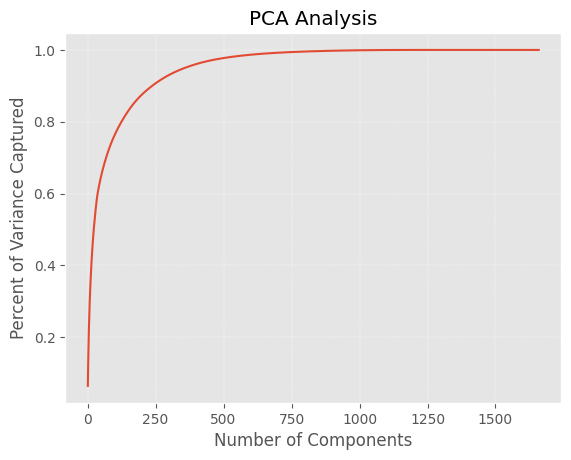

In [69]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 1658 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [70]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(1732, 358)

##### Which dimensionality reduction technique have you used and why?

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - 1 (K-Means Clustering)

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 25 clusters and try to find the optimal number of clusters with ELBOW method.

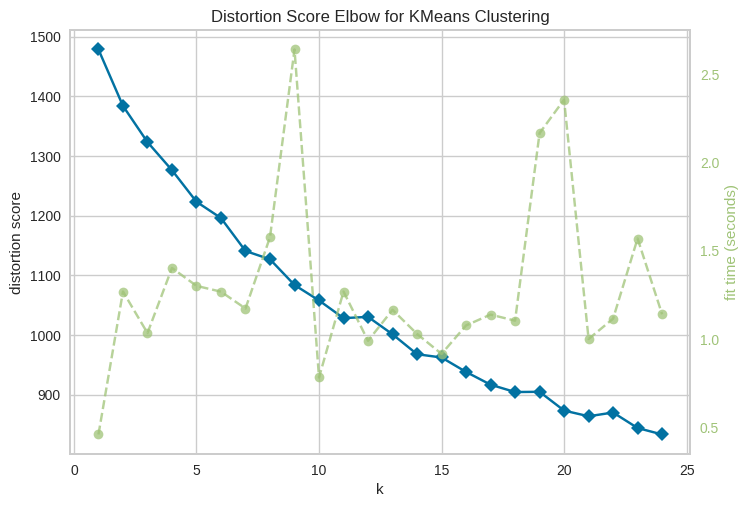

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,25),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 4 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is **Silhouette Score**?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

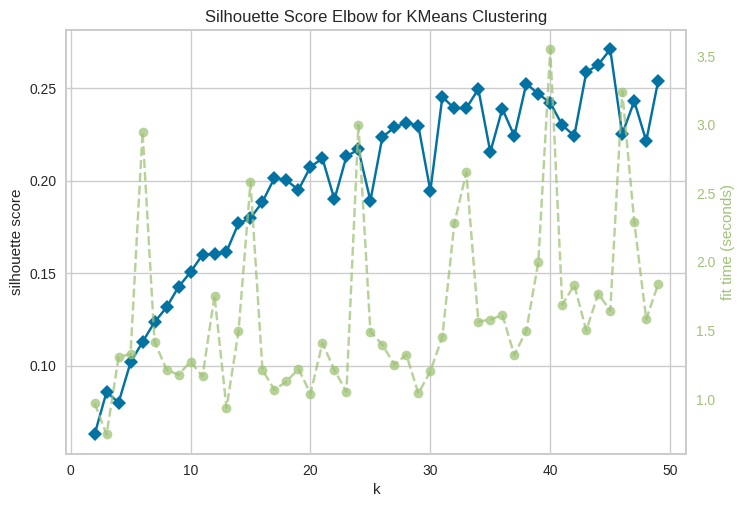

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,50), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 42 number of clusters, but it is very high. So we will visualize both 4 and 42 clusters and then find out which will look better.

Now let's plot and see how our data points look like after assigning to their respective clusters.

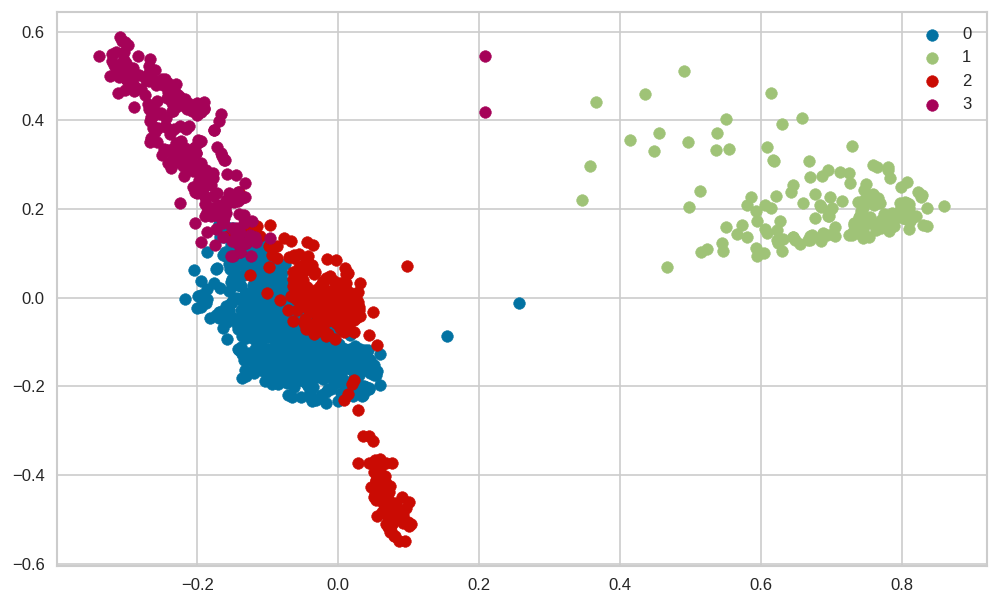

In [73]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

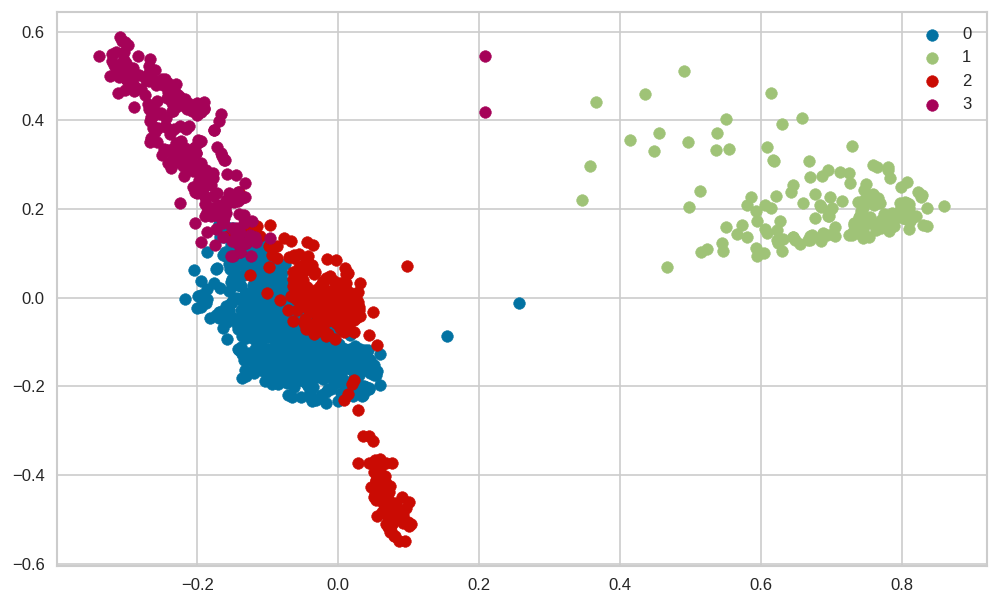

In [74]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We can see that for 4 numbers of cluster the cluster seperation is good but not for 42 clusters. We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

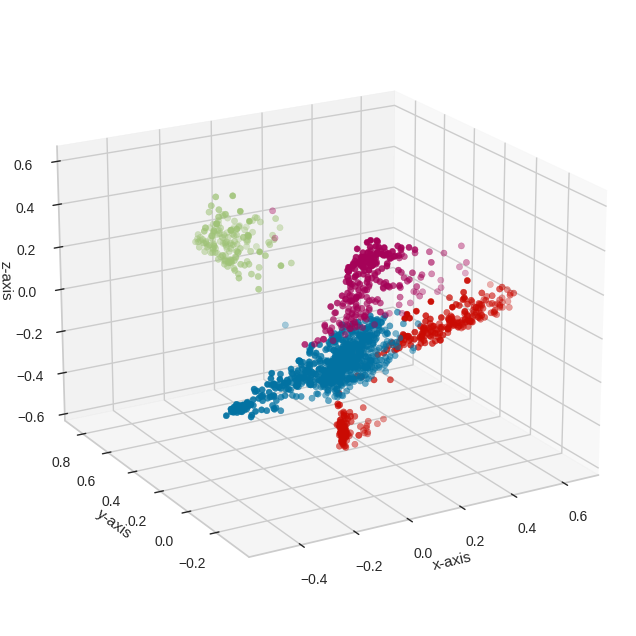

In [75]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 4 clusters with nacked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [76]:
# Add cluster values to the dateframe.
listings_info['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [77]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the products'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = listings_info[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

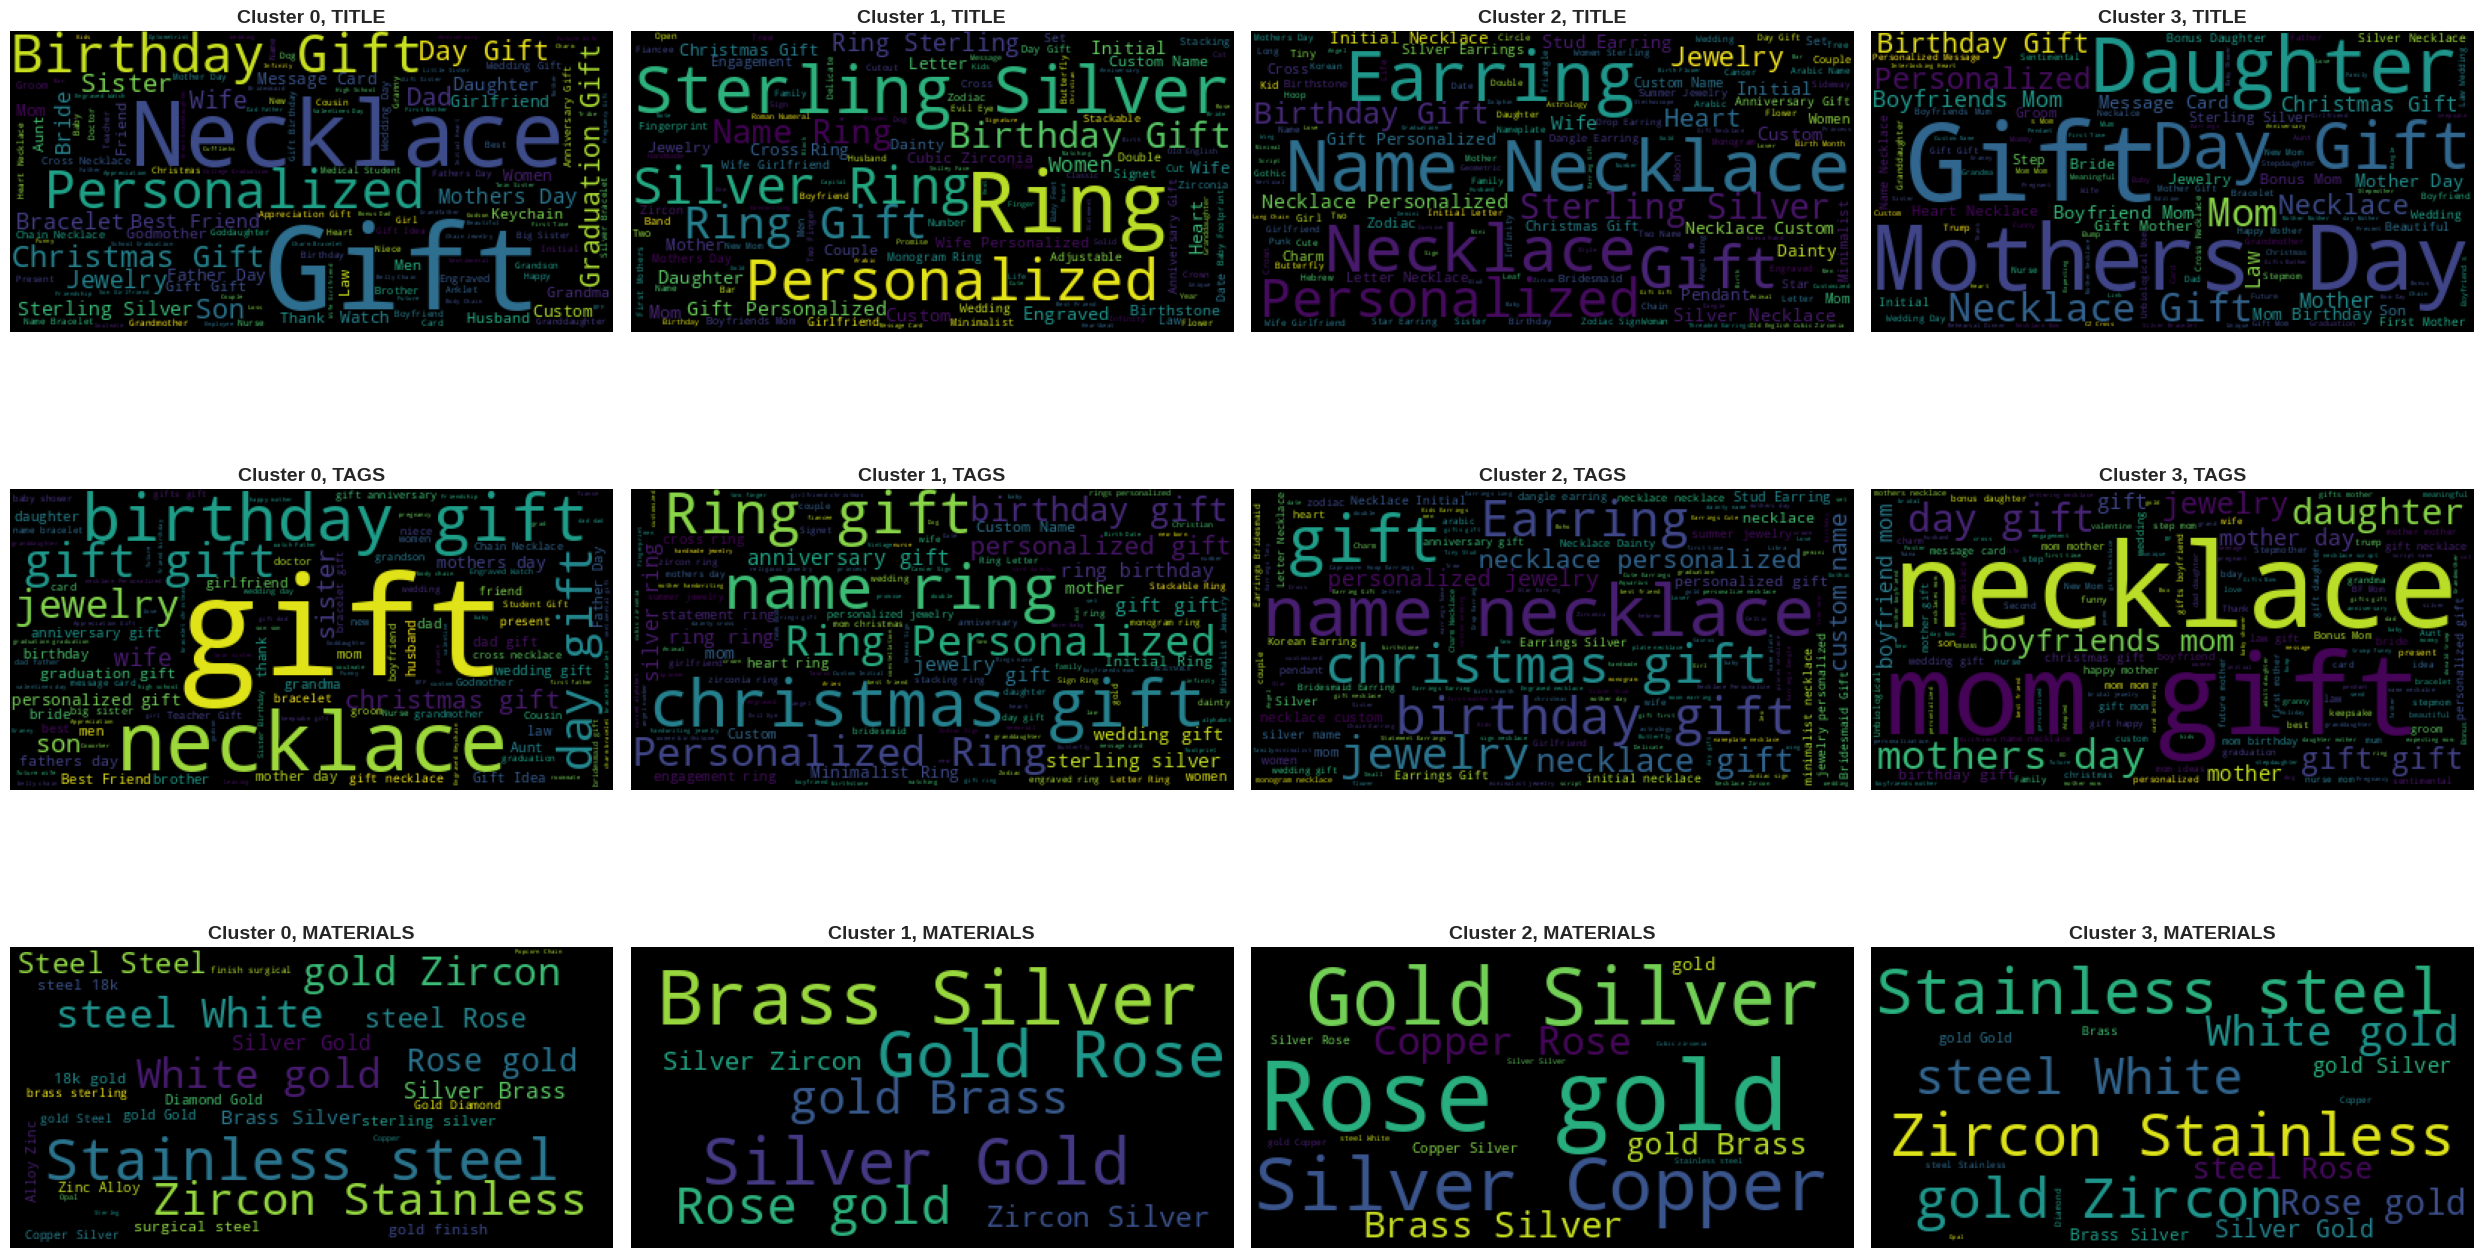

In [78]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(25, 15))
for i in range(4):
    for j, col in enumerate(['TITLE', 'TAGS', 'MATERIALS']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 (Hierarchial Clustering)

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

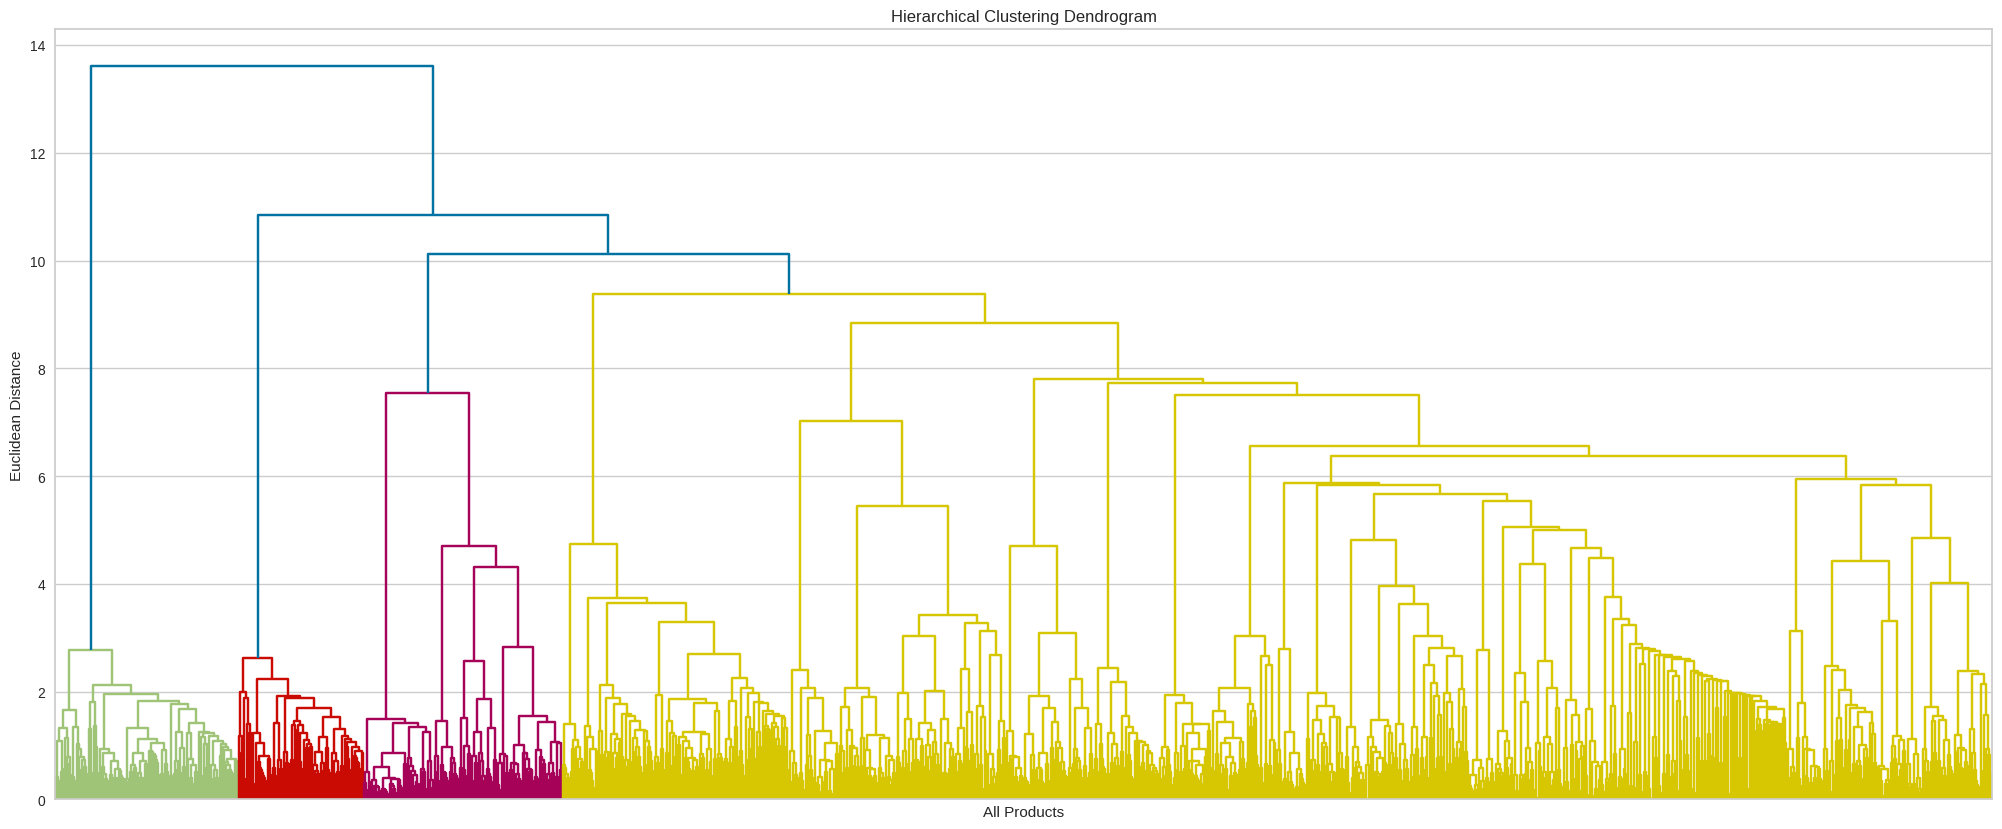

In [79]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All Products')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

Cool, but what is Dendogram and how to determine the **optimal value of clusters?**

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* From the above Dendogram we can say that optimal value of clusters is 4. But before assigning the vlaues to respective clusters, let's check the solhoutte scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [80]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 50)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.058076
k=3, Silhouette score=0.078927
k=4, Silhouette score=0.069048
k=5, Silhouette score=0.080444
k=6, Silhouette score=0.093682
k=7, Silhouette score=0.103135
k=8, Silhouette score=0.108948
k=9, Silhouette score=0.108837
k=10, Silhouette score=0.119438
k=11, Silhouette score=0.128035
k=12, Silhouette score=0.134603
k=13, Silhouette score=0.141882
k=14, Silhouette score=0.149189
k=15, Silhouette score=0.156332
k=16, Silhouette score=0.161893
k=17, Silhouette score=0.165735
k=18, Silhouette score=0.171474
k=19, Silhouette score=0.177540
k=20, Silhouette score=0.179076
k=21, Silhouette score=0.184479
k=22, Silhouette score=0.188916
k=23, Silhouette score=0.193432
k=24, Silhouette score=0.197387
k=25, Silhouette score=0.198502
k=26, Silhouette score=0.198629
k=27, Silhouette score=0.201343
k=28, Silhouette score=0.205521
k=29, Silhouette score=0.209589
k=30, Silhouette score=0.213261
k=31, Silhouette score=0.217033
k=32, Silhouette score=0.217238
k=33, Silhouette

From the above silhouette scores it is clear that the 46  clusters are optimal value (maximum Silhouette score), which is different from the above Dendogram that for 4 cluters the euclidean distances are maximum.

But 46 clusters is so high, so I talked with the manager of the company and asked them how many types of sections they have for their products. And he told me to take 4 for clustering.

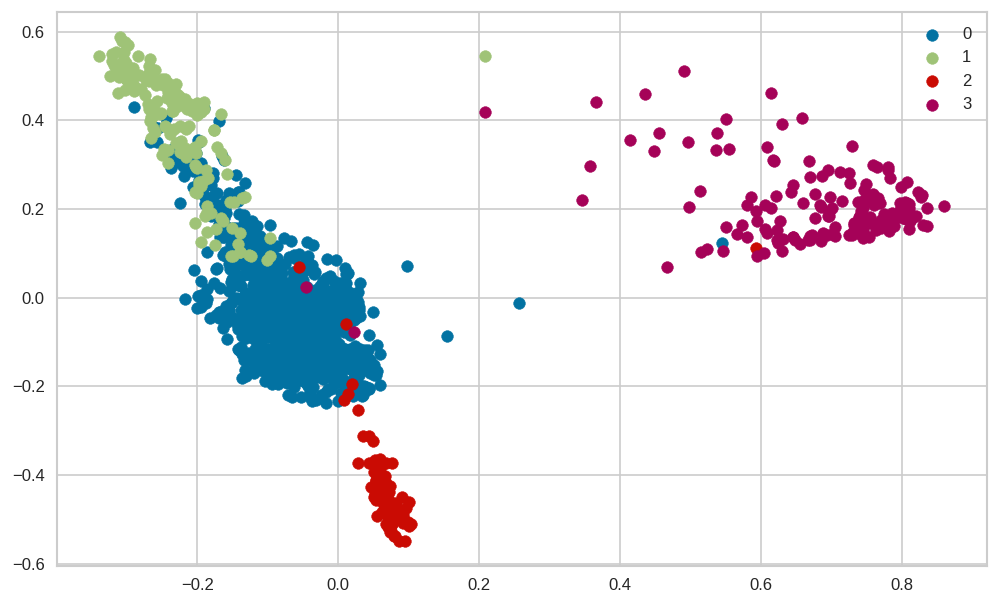

In [81]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters clearly.

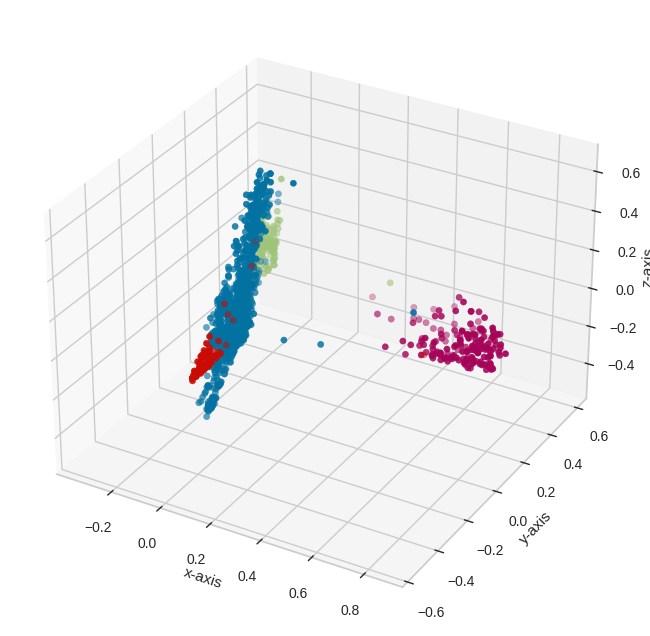

In [82]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can again easily differentiate the all 22 clusters with nacked eye. Now let's assign the products in their respective cluster by appending 1 more attribute in the final dataframe.

In [83]:
# Add cluster values to the dateframe.
listings_info['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [84]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for products'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = listings_info[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

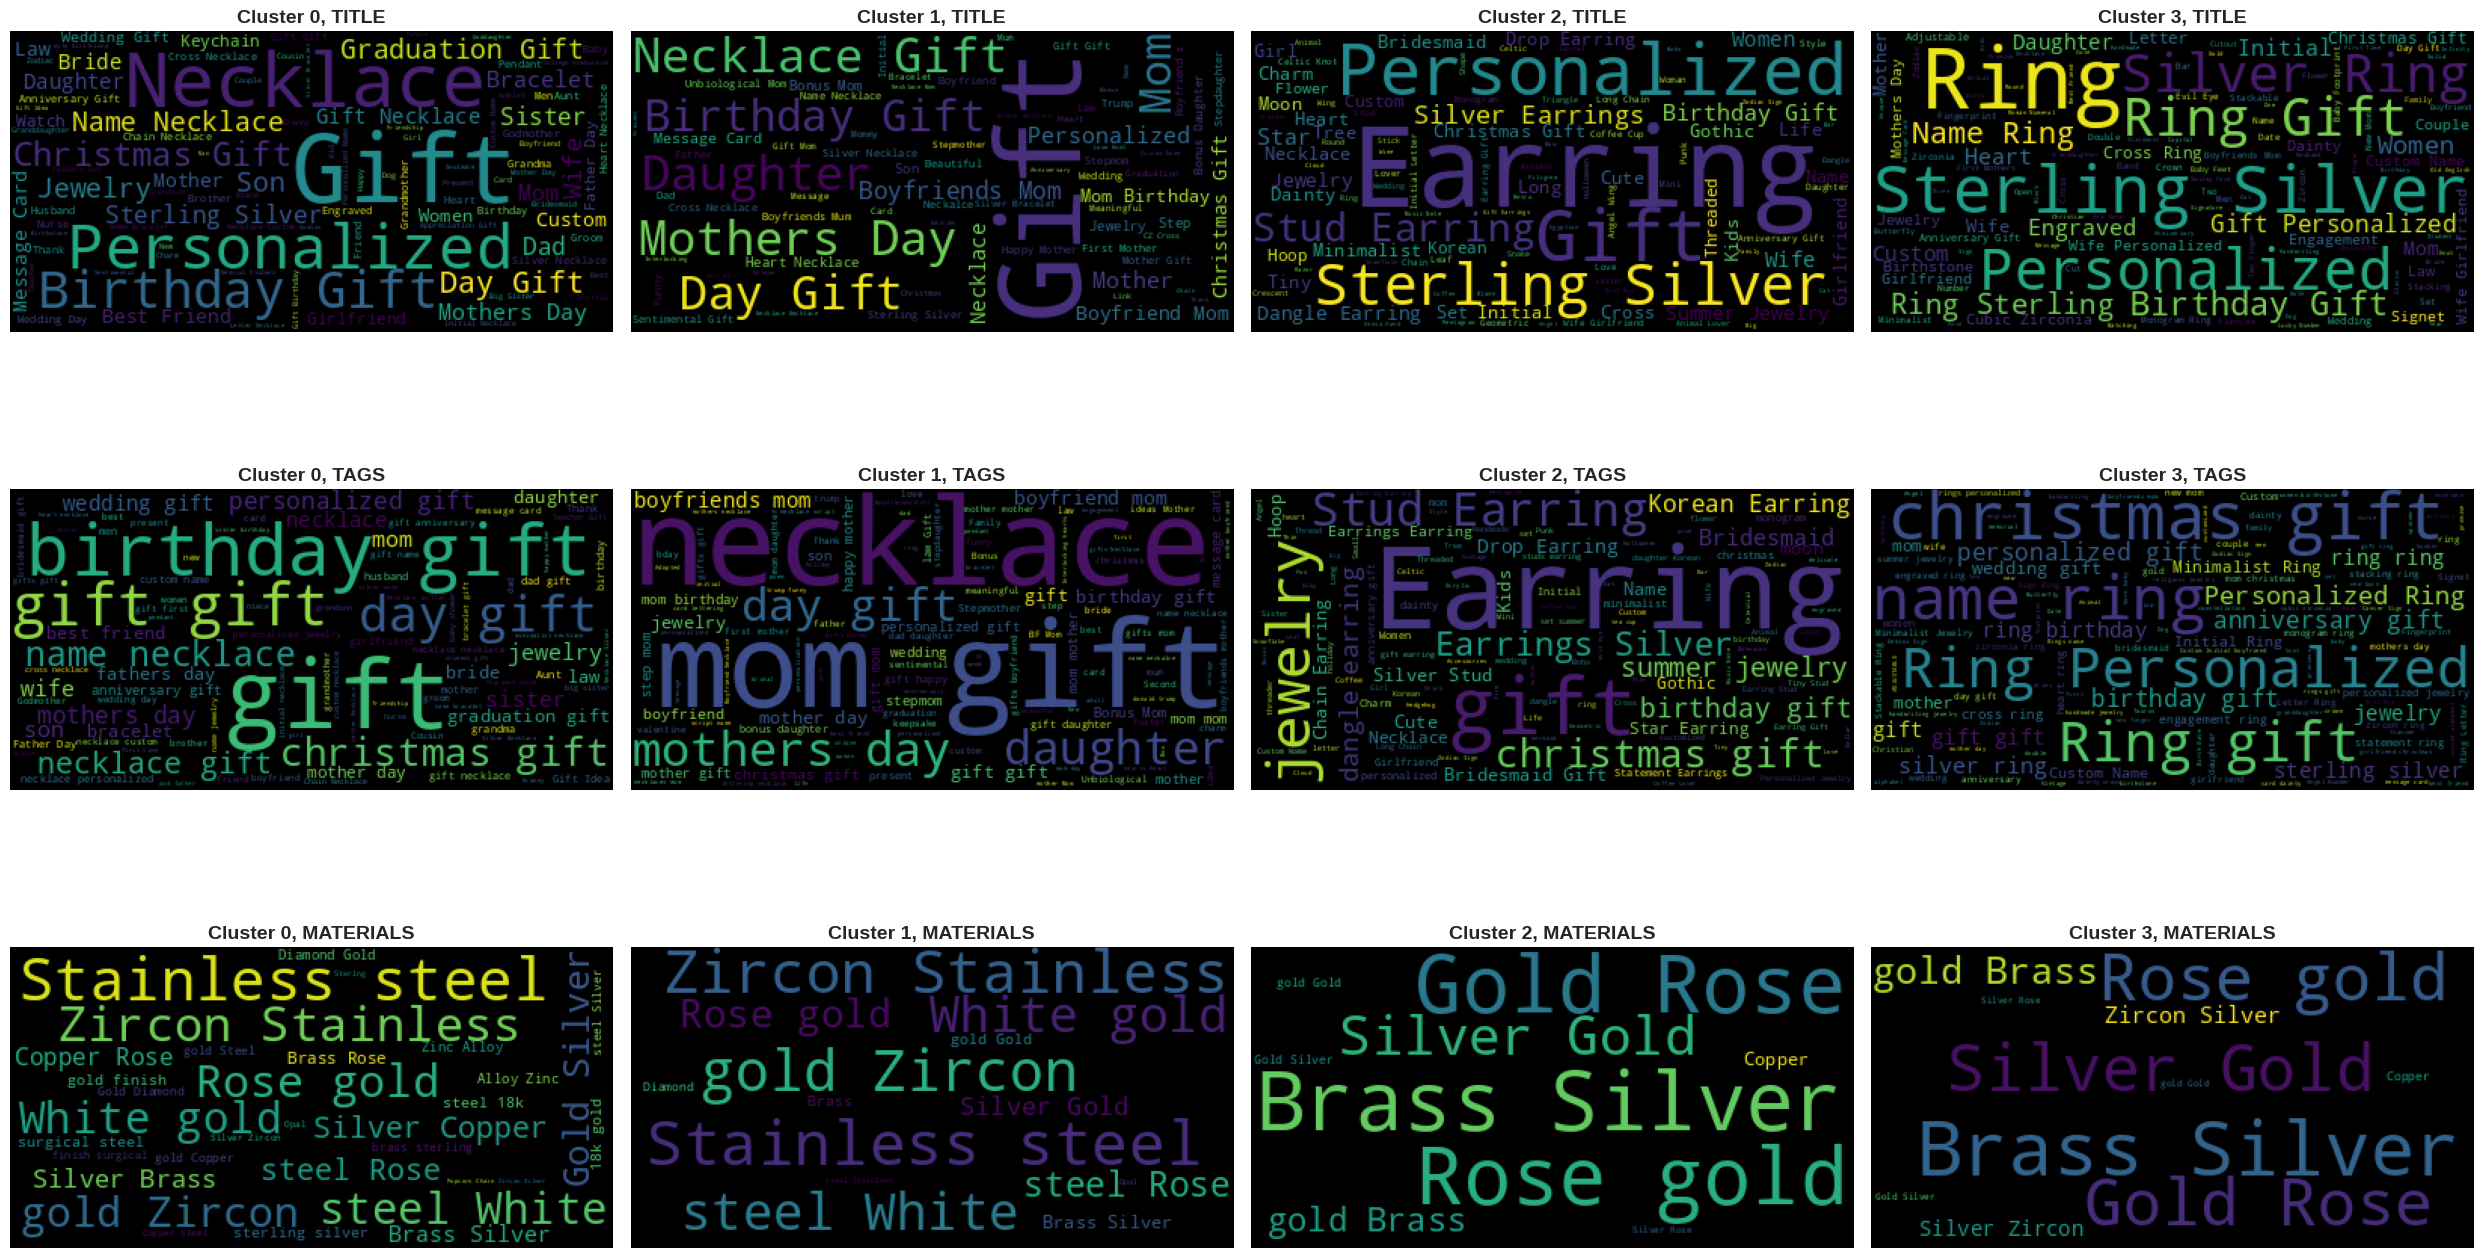

In [85]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(25, 15))
for i in range(4):
    for j, col in enumerate(['TITLE', 'TAGS', 'MATERIALS']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 (Building a Recommendaton System)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We'll are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [86]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(listings_info['product_details'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(TITLE, cosine_sim=cosine_sim, data=listings_info):
    # Get the index of the input title in the programme_list
    programme_list = data['TITLE'].to_list()
    index = programme_list.index(TITLE)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended products titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_products = data['TITLE'].iloc[recommend_index].tolist()
    rec_SKU = data.loc[data['TITLE'].isin(rec_products), 'SKU'].tolist()
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_products, rec_SKU, rec_score)), columns=['Recommendation','SKU','Similarity_score(0-1)'])

    return rec_table

In [87]:
# listings_info.loc[listings_info['TITLE'].isin(['Big sister little sister necklace gift, two 2 sisters necklace, Sister jewellery gifts,christmas birthday gift for sister', 'Birthday Gift For Twin Sister, To My Twin Sister Necklace, Present For Twin,Twin Sister Christmas Gift,Twins Jewelry,Gira']),'SKU'].tolist()

Let's check how our recommender system is performing.

In [88]:
listings_info.loc[0:100,['TITLE', 'SKU', 'TAGS']]

TITLE      SKU  \
0    Gifts for Husband Boyfriend Curb Link Chain Ne...   SG1573   
1    Birthday Gift For Twin Sister, To My Twin Sist...   SG0555   
2    To My Great Granddaughter Gift For Great Grand...   SG0527   
3    white coat charm ,Beautiful White Coat Ceremon...   SGO157   
4    Personalized Grace Cross Necklace, Necklace Re...  SGZ0231   
..                                                 ...      ...   
96   Personalized Round Signet Initial Ring, Monogr...  SGZ0503   
97   Personalized Delicate Engraved Ring, 925 Sterl...  SGZ0508   
98   Personalized Sterling Silver Bible Quote Engra...  SGZ0491   
99   Personalized Zodiac Sign Ring, 925 Sterling Si...  SGZ0492   
100  Personalized Engraved Initial Round Ring with ...  SGZ0498   

                                                  TAGS  
0    Chain Necklace From girlfriend Birthday Gift h...  
1    twin sister gift gift for twin sister sister t...  
2    birthday gift personalized gift great-granddau...  
3    Medical Student Gift future doctor gifts Physi...  
4    Name necklace Grace Cross Necklace Cross Neckl...  
..                                                 ...  
96   Personalized Ring Gift for Her Initial Ring Le...  
97   name ring Stacking Ring Engraved Ring Gift for...  
98   Custom Name Ring Personalized Ring gift for he...  
99   Personalized Ring gift for her christmas gift ...  
100  Personalized Ring Initial Ring Silver Gift for...  

[101 rows x 3 columns]

In [89]:
# Testing 1
recommend_content('Big sister little sister necklace gift, two 2 sisters necklace, Sister jewellery gifts,christmas birthday gift for sister')

Recommendation     SKU  \
0  Wonderful Sisters Necklace, Birthday Gift For ...  SG0567   
1  Big Sister Necklace Gift Sister Gifts Big Sist...  SG0537   
2  Big Sister & Little Sister Necklace Big Sis Li...  SG0542   
3  To My Beautiful Sister Necklace Gift, Christma...  SG0566   
4  Big Sister & Little Sister Necklace, Big Sis L...  SG0560   
5  Big Sister Christmas Gift Necklace Sister Gift...  SG0541   
6  Big Sister & Little Sister Necklace, Big Sis L...  SG0570   
7  Sister Christmas Gift Necklace From Sister On ...  SG0540   
8  Sister Necklace, Gift For Big Sister, Gift Fro...  SG0831   
9  Big Sister Necklace Gift Sister Gifts Big Sist...  SG0827   

   Similarity_score(0-1)  
0                 0.9127  
1                 0.8889  
2                 0.8882  
3                 0.8774  
4                 0.8762  
5                 0.8702  
6                 0.8689  
7                 0.8581  
8                 0.8544  
9                 0.8405

In [90]:
# Testing 2
recommend_content('Baby Shower Hostess Gift, Baby Name Necklace, Baby Boy Shower Hostess Thank You Gift, Baby Girl Shower Host Gifts, Initial Heart #0201')

Recommendation      SKU  \
0  Granddaughter Pregnancy Gift For Granddaughter...  SGZ0493   
1  Pregnancy Gift for Friend, Gift for First Time...   SG1514   
2  Wife Pregnancy Gift for Wife Baby Shower Gift ...   SG0228   
3  Daughter-in-Law Pregnancy Gift For Daughter In...   SG0229   
4  Christmas Gift from Rainbow Baby, Memorial Cha...   SG0218   
5  Christmas Gift from Rainbow Baby, Memorial Cha...   SG0794   
6  Daughter-in-Law Pregnancy Gift For Daughter In...   SG0205   
7  Baby Loss Gift Curb Chain Necklace, Gift for D...   SG0877   
8  Personalized Baby Feet Ring, 925 Sterling Silv...   SG1492   
9  Best Friend Pregnancy Gift For Best Friend Bab...   SG1492   

   Similarity_score(0-1)  
0                 0.3286  
1                 0.2827  
2                 0.2826  
3                 0.2757  
4                 0.2728  
5                 0.2691  
6                 0.2671  
7                 0.2638  
8                 0.2634  
9                 0.2573

In [91]:
# Testing 3
recommend_content('To My Man Chain Necklace for Him, Romantic Gifts for Him, Christmas Jewelry for Men, Birthday Gift for Husband, Jewelry for Him')

Recommendation      SKU  \
0  To My Man Curb Chain Necklace for Him, Romanti...   SG1573   
1  Gifts for Husband Boyfriend Curb Link Chain Ne...  SGZ0569   
2  To My Man Cross Necklace, Gifts For Boyfriend,...   SG0993   
3  Christmas Gift for Boyfriend, Personalized Pro...   SG1057   
4  Personalized Promise Bracelet For Husband or B...   SG0866   
5  Birthday Gift For Him Men's Engraved Cross Pen...  SGZ0600   
6  To My Man Promise Bracelet Gift, Christmas  Gi...  SGZ0563   
7  Personalized To My Man Christmas Gift, Sterlin...  SGZ0559   
8  Gift for Husband, Valntines Day Gift For Him, ...   SG1451   
9  Custom Name Necklace Gift for Boyfriend Mom, B...   SG1127   

   Similarity_score(0-1)  
0                 0.8492  
1                 0.5597  
2                 0.5446  
3                 0.5036  
4                 0.4618  
5                 0.4394  
6                 0.4300  
7                 0.4238  
8                 0.4141  
9                 0.4121

In [92]:
# Testing 4
recommend_content('Personalized Two Finger Name Ring, Custom Double Finger Name Ring, Personalized Jewelry for Women, Customized Gift for Her, Christmas Gift')

Recommendation      SKU  \
0  Personalized Old English Two Finger Name Ring,...  SGZ0488   
1  Personalized Engraved Two Finger Name Ring for...  SGZ0439   
2  Personalized Capital Letters Two Finger Name R...  SGZ0413   
3  Personalized Double Finger Cross Name Ring, Je...  SGZ0406   
4  Personalized Double Name Ring, Two Name Ring f...  SGZ0404   
5  Personalized Initial Ring, 925 Sterling Silver...  SGZ0403   
6  Custom Name Ring For Her, 925 Sterling Silver,...  SGZ0414   
7  Personalized Stackable Name Rings, Stacking Na...  SGZ0525   
8  Personalized Engraved Name Ring, 925 Sterling ...  SGZ0441   
9  Personalized Initial Ring for Women, 925 Sterl...  SGZ0490   

   Similarity_score(0-1)  
0                 0.9420  
1                 0.9043  
2                 0.8920  
3                 0.8420  
4                 0.8268  
5                 0.8049  
6                 0.8026  
7                 0.7921  
8                 0.7876  
9                 0.7779

In [93]:
# Testing 4
recommend_content('Custom Name Stethoscope Necklace, Heart Name Necklace, Personalized Name Necklace, Medical Student Gift, Nurse Gift, Graduation Gift for Her')

Recommendation      SKU  \
0  Custom Name Stethoscope Necklace, Heart Name N...  SGZ0090   
1  Custom Name Stethoscope Necklace, Heart Name N...  SGZ0018   
2  Custom Stethoscope Bracelet With Name, Stethos...  SGZ0022   
3  Custom Stethoscop Necklace With Name, 0.925 St...  SGZ0090   
4  Custom Stethoscope Pendant With Initial, Steth...  SGZ0090   
5  Nurse Mom Mother's Day Stethoscope Necklace,  ...   SG0381   
6  Graduation Gift Registered Nurse Gifts for New...   SG0378   
7  Nurse Necklace, Nurse 3D Bar Necklace, Nurse N...   SG1357   
8  Nurse Mom Mother's Day Necklace, Nurse Mom jew...   SG1359   
9  Personalized Necklace Gift for Nurse, Mothers ...   SG1501   

   Similarity_score(0-1)  
0                 1.0000  
1                 0.9995  
2                 0.7260  
3                 0.7222  
4                 0.6258  
5                 0.5484  
6                 0.5467  
7                 0.5279  
8                 0.5133  
9                 0.4985

### **Make pickle for local website**

In [94]:
import pickle

In [95]:

pickle.dump(listings_info.to_dict(), open('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/product_dict.pkl','wb'))

In [96]:
pickle.dump(cosine_sim, open('/content/drive/MyDrive/Colab Notebooks/Almax/E-commerce Mega Project/Etsy Store Recommender System/cosine_similarity.pkl','wb'))

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.